# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

What are the actions that can be taken and in which areas should investments be made in order to increase SAT participation rates among high school students across the United States.

## Executive Summary


### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

## Libraries

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
import math

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [23]:
# Import SAT and ACT datasets
act_2017 = pd.read_csv('../data/act_2017.csv')
sat_2017 = pd.read_csv('../data/sat_2017.csv')

In [24]:
# Check type to ensure its in DataFrame
print(type(act_2017))
print(type(sat_2017))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [25]:
#Print out the first 10 rows for ACT 2017 dataset to examine what it looks like
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [26]:
##Print out the first 10 rows for SAT 2017 dataset to examine what it looks like
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [27]:
# Check the shape of data sets
print(act_2017.shape)
print(sat_2017.shape)

(52, 7)
(51, 5)


In [28]:
# Check the name of the columns
print(act_2017.columns)
print(sat_2017.columns)

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')
Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')


Both ACT and SAT data set shows the particpation rate of high students per State across USA.
Their rows indicate the name of the States.

ACT data has 7 columns which is made up of State, Participation(rate), English, Math, Science, Reading and Composite(Average).
The Participation rate is shown in percentage, while English, Math, Science, Reading columns indicate the average score for each subject (range from 1-36).
Composite column is the average score for English, Math, Science and Reading.


Meanwhile SAT data has 5 columns which is made up of State, Participation(rate), Evidence-Based Reading and Writing, Math and Total.
The Participation rate is shown in percentage, while Evidence-Based Reading and Writing and Math column indicate the average score for each subject(range from 200-800).
Total column is made up of the sum of average score for Evidence-Based Reading and Writing and Math(range 400-1600).

#### 4a. Does the data look complete? 

The data does look complete, however I notice unlike the SAT data set ACT data set has an additional 
row for the national figure.

In [29]:
# Check for nulls in Act 2017
act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [30]:
# Check for nulls in Sat 2017
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [31]:
# Check data type of ACT columns
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


In [32]:
# Check data type of SAT columns
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

ACT 
Participation which is calculated in percentage has a minimum possible value of 0 and maximum possible
value of 1 (100%).
For English, Math, Reading and Science the Overall Score Range is 1 (minimum) to 36 (maximum).
Composite which is the mean English, Math, Reading and Science the Overall Score Range is 1 (minimum) 
to 36 (maximum).

Reference: <br>
https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html

SAT
Participation which is calculated in percentage has a minimum possible value of 0 and maximum possible
value of 1 (100%).
For Evidence-Based Reading and Writing, Math the Overall score range is from 200 (minimum) 
to 800 (maximum).

Reference: <br>
https://collegereadiness.collegeboard.org/sat/scores/understanding-scores/structure

In [33]:
#Min and Max result for English, Math, Reading and Science
#Composite and Particpation is currently an object dtype will check in Qn 6
#Notice a score value of 2.3 in the Science Column, eventhough its in the range will double check
print('Minimum Possible Value')
print(act_2017[['English', 'Math', 'Reading', 'Science']].min())
print('Maximum Possible Value')
print(act_2017[['English', 'Math', 'Reading', 'Science']].max())

Minimum Possible Value
English    16.3
Math       18.0
Reading    18.1
Science     2.3
dtype: float64
Maximum Possible Value
English    25.5
Math       25.3
Reading    26.0
Science    24.9
dtype: float64


In [34]:
# Min and Max result for Evidence-Based Reading and Writing, Math
# Particpation is currently an object dtype will check once dtype is amended to float in Qn 6
# Notice a score value of 52 in the Math Column is below the range
print('Minimum Possible Value')
print(sat_2017[['Evidence-Based Reading and Writing', 'Math']].min())
print('Maximum Possible Value')
print(sat_2017[['Evidence-Based Reading and Writing', 'Math']].max())

Minimum Possible Value
Evidence-Based Reading and Writing    482
Math                                   52
dtype: int64
Maximum Possible Value
Evidence-Based Reading and Writing    644
Math                                  651
dtype: int64


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [35]:
# Extract row showing the incorrect value for SAT Math 
sat_2017[sat_2017['Math'] <= 52]
# Amend the Math data value for Maryland to 524
sat_2017.loc[20,'Math'] = sat_2017.iloc[20,4] - sat_2017.iloc[20,2]
sat_2017.iloc[18:21]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
18,Louisiana,4%,611,586,1198
19,Maine,95%,513,499,1012
20,Maryland,69%,536,524,1060


In [36]:
# Extract the row with the outlier of 2.3 for Science
act_2017[act_2017['Science'] == 2.3]
# Average Total Composite * 4 = 94.4
# Avg total less sum of English, Math and REading = 23.8
act_2017.iloc[21,5] = (float(act_2017.iloc[21,6])*4) - np.sum(act_2017.iloc[21,2:5])
act_2017.iloc[18:22]

,State,Participation,English,Math,Reading,Science,Composite
18,Kentucky,100%,19.6,19.4,20.5,20.1,20.0
19,Louisiana,100%,19.4,18.8,19.8,19.6,19.5
20,Maine,8%,24.2,24.0,24.8,23.7,24.3
21,Maryland,28%,23.3,23.1,24.2,23.8,23.6


#### 5. What are your data types? 
Display the data types of each feature. 

In [39]:
# Data type of each feature in the ACT and SAT data sets can be found in Qn 4a

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

-ACT Participation and Composite dtype shows as object but should be float

-SAT Participation dtype shows as object should should be float

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [40]:
act_2017.head(2)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2


In [41]:
sat_2017.head(2)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080


In [42]:
# Remove '%' and replace with blank ('') using lambda function
act_2017['Participation'] = act_2017['Participation'].map(lambda state: state.replace('%',''))
sat_2017['Participation'] = sat_2017['Participation'].map(lambda state: state.replace('%',''))
# Change type to float and convert to decimal place by dividing the cells in Participation over 100
act_2017['Participation'] = act_2017['Participation'].astype(float) / 100 
sat_2017['Participation'] = sat_2017['Participation'].astype(float) / 100

In [43]:
# Min and Max result for Particpation rate in SAT 2017
print('Minimum Possible Value')
print(sat_2017[['Participation']].min())
print('Maximum Possible Value')
print(sat_2017[['Participation']].max())

Minimum Possible Value
Participation    0.02
dtype: float64
Maximum Possible Value
Participation    1.0
dtype: float64


- Fix any individual values preventing other columns from being the appropriate type.

In [46]:
# Using np.unique to identify whats causing the column to show as object type
np.unique(act_2017['Composite'])

array(['17.8', '18.6', '18.7', '19.0', '19.1', '19.2', '19.4', '19.5',
       '19.7', '19.8', '20.0', '20.2x', '20.3', '20.4', '20.5', '20.7',
       '20.8', '21.0', '21.4', '21.5', '21.7', '21.8', '21.9', '22.0',
       '22.3', '22.6', '22.8', '23.6', '23.7', '23.8', '23.9', '24.0',
       '24.1', '24.2', '24.3', '25.2', '25.4', '25.5'], dtype=object)

In [47]:
#Remove 'x' and replace with blank ('') using lambda function
act_2017['Composite'] = act_2017['Composite'].map(lambda comp: comp.replace('x',''))
#Change type to float
act_2017['Composite']  = act_2017['Composite'].astype(float)

In [48]:
# Min and Max result for Particpation rate and Composite in ACT 2017
print('Minimum Possible Value')
print(act_2017[['Participation','Composite']].min())
print('Maximum Possible Value')
print(act_2017[['Participation','Composite']].max())

Minimum Possible Value
Participation     0.08
Composite        17.80
dtype: float64
Maximum Possible Value
Participation     1.0
Composite        25.5
dtype: float64


- Finish your data modifications by making sure the columns are now typed appropriately.

In [49]:
# Checked column data type, ensure its float
print(act_2017['Participation'].dtypes)
print(act_2017['Composite'].dtypes)
print(sat_2017['Participation'].dtypes)

float64
float64
float64


- Display the data types again to confirm they are correct.

In [50]:
#Display data types for all column in dataframe for ACT 2017
print(act_2017.head(2))
act_2017.dtypes

      State  Participation  English  Math  Reading  Science  Composite
0  National            0.6     20.3  20.7     21.4     21.0       21.0
1   Alabama            1.0     18.9  18.4     19.7     19.4       19.2


State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [51]:
#Display data types for all column in dataframe for SAT 2017
print(sat_2017.head(2))
sat_2017.dtypes

     State  Participation  Evidence-Based Reading and Writing  Math  Total
0  Alabama           0.05                                 593   572   1165
1   Alaska           0.38                                 547   533   1080


State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [52]:
# Check act_2017 columns
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [53]:
# Rename the columns to lower case and  spaces to '_'
# Add act17 prefix for all columns except state in order to differentiate between data sets columns when they are combined

def update_cols_act(act_2017,act17):
    act_2017.columns = [x.lower().replace(' ','_').replace('participation','rate').replace('english','eng')
                        .replace('reading', 'read').replace('composite', 'comp') for x in act_2017.columns] 
    act_2017.columns = [act17 + x if x !='state' else x for x in act_2017.columns]
    return act_2017

In [54]:
# Ensure the columns have been updated 
act_2017 = update_cols_act(act_2017,"act17_")
print(act_2017.columns)

Index(['state', 'act17_rate', 'act17_eng', 'act17_math', 'act17_read',
       'act17_science', 'act17_comp'],
      dtype='object')


In [55]:
# Check sat_2017 columns
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [56]:
# Rename the columns to lower case and  spaces to '_'
# Add sat17 prefix for all columns except state in order to differentiate between data sets columns when they are combined
def update_cols_sat(sat_2017,sat17):
    sat_2017.columns = [x.lower().replace(' ','_').replace('participation','rate')
                        .replace('evidence-based_reading_and_writing','ebrw') for x in sat_2017.columns] 
    sat_2017.columns = [sat17 + x if x !='state' else x for x in sat_2017.columns]
    return sat_2017

In [57]:
# Add fuction to data set 
# Ensure the columns have been updated 
sat_2017 = update_cols_sat(sat_2017,"sat17_")
print(sat_2017.columns)

Index(['state', 'sat17_rate', 'sat17_ebrw', 'sat17_math', 'sat17_total'], dtype='object')


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|Score Range(Min-Max)
|---|---|---|---|---|
|**state**|*object*|2017 ACT/SAT|States in the USA and District of Columbia|N/A
|**act17_rate**|*float*|2017 ACT|Mean Participation Rate for ACT in the respective state (Expressed in Decimal)|0 - 1
|**act17_eng**|*float*|2017 ACT|Mean English score in the ACT|1 - 36
|**act17_math**|*float*|2017 ACT|Mean Math score in the ACT|1 to 36
|**act17_read**|*float*|2017 ACT|Mean Reading score in the ACT|1 - 36
|**act17_science**|*float*|2017 ACT|Mean Science score in the ACT|1 - 36
|**act17_comp**|*float*|2017 ACT|Average score English, Math, Reading & Science|1 to 36
|**sat17_rate**|*float*|2017 SAT|Mean Participation Rate for SAT in the respective state (Expressed in Decimal)|0 - 1
|**sat17_ebrw**|*int*|2017 SAT|Mean Evidence-Based Reading and Writing score in the SAT|200 - 800
|**sat17_math**|*int*|2017 SAT|Mean Math score in the SAT|200 - 800
|**sat17_total**|*int*|2017 SAT|Mean Total score of Evidence-Based Reading and Writing & Math|400 - 1600

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [58]:
# Used drop to remove the additional "National" row in ACT dataframe
act_2017.drop(index = 0, inplace = True)
act_2017.head()

,state,act17_rate,act17_eng,act17_math,act17_read,act17_science,act17_comp
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [59]:
# Use merge to combine the ACT and SAT dataframes and assigned to new variable merged_2017
merged_2017 = pd.merge(act_2017, sat_2017, on='state')
merged_2017.head()

,state,act17_rate,act17_eng,act17_math,act17_read,act17_science,act17_comp,sat17_rate,sat17_ebrw,sat17_math,sat17_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [60]:
#Used .to_csv to convert the merged 2017 file into csv format and saved in the path below as 
#combined_2017
merged_2017.to_csv(r'..\data\combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [61]:
# Import ACT and SAT 2018 datasets
act_2018 = pd.read_csv('../data/act_2018_updated.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')

In [62]:
# Check type of ACT and SAT 2018 data to ensure its DataFrame format
print(type(act_2018))
print(type(sat_2018))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [63]:
#Print out the first 10 rows for ACT 2018 dataset to examine what it looks like
act_2018.head(10)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,32,23.6,23.7,22.7,24.4,23.0
9,Florida,66,19.9,19.2,19.3,21.1,19.5


In [64]:
#Print out the first 10 rows for SAT 2018 dataset to examine what it looks like
sat_2018.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [65]:
# Check the shape of the data sets ensure no unnecessary rows
print(act_2018.shape)
print(sat_2018.shape)

(51, 7)
(51, 5)


In [68]:
# Look at the data types of the columns for both ACT and SAT 2018
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [69]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [70]:
# Check the non-null count to ensure no missing value
act_2018.isnull().sum()

State                            0
Percentage of Students Tested    0
Average Composite Score          0
Average English Score            0
Average Math Score               0
Average Reading Score            0
Average Science Score            0
dtype: int64

In [71]:
sat_2018.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [72]:
# Check Min and Max possible values ensuring their in the range for ACT 2018
print('Minimum Possible Value')
print(act_2018[['Percentage of Students Tested', 'Average Composite Score',
                'Average English Score', 'Average Math Score', 'Average Reading Score',	
                'Average Science Score']].min())
print('Maximum Possible Value')
print(act_2018[['Percentage of Students Tested', 'Average Composite Score',
                'Average English Score', 'Average Math Score', 'Average Reading Score',	
                'Average Science Score']].max())

Minimum Possible Value
Percentage of Students Tested     7.0
Average Composite Score          17.7
Average English Score            16.6
Average Math Score               17.8
Average Reading Score            18.0
Average Science Score            17.9
dtype: float64
Maximum Possible Value
Percentage of Students Tested    100.0
Average Composite Score           25.6
Average English Score             26.0
Average Math Score                25.2
Average Reading Score             26.1
Average Science Score             24.9
dtype: float64


In [73]:
# Check Min and Max possible values ensuring their in the range for SAT 2018
print('Minimum Possible Value')
print(sat_2018[['Participation', 'Evidence-Based Reading and Writing', 'Math']].min())
print('Maximum Possible Value')
print(sat_2018[['Participation', 'Evidence-Based Reading and Writing', 'Math']].max())

Minimum Possible Value
Participation                         10%
Evidence-Based Reading and Writing    480
Math                                  480
dtype: object
Maximum Possible Value
Participation                         99%
Evidence-Based Reading and Writing    643
Math                                  655
dtype: object


In [74]:
# Change type to float and convert to decimal place by dividing the cells in Percentage Of Students Tested over 100
act_2018['Percentage of Students Tested'] = act_2018['Percentage of Students Tested'].astype(float)/100

In [75]:
# Use lambda function to replace '%' with '' (blank)
sat_2018['Participation'] = sat_2018['Participation'].map(lambda part: part.replace('%',''))
# Change type to float and convert to decimal place by dividing the cells in Participation over 100
sat_2018['Participation'] = sat_2018['Participation'].astype(float)/100

In [76]:
# Display data types for all column for ACT and SAT 2018 to check if amendment has been made
print(act_2018.dtypes)
print(sat_2018.dtypes)

State                             object
Percentage of Students Tested    float64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object
State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object


#### Rename Columns

In [77]:
# Shift Average Composite Score to the last column to standardize with ACT 2017 data set
act_2018 = act_2018[['State', 'Percentage of Students Tested', 'Average English Score',
                    'Average Math Score', 'Average Reading Score', 'Average Science Score',
                    'Average Composite Score']]

In [78]:
# Rename the columns to lower case and spaces to '_'
# Add act18 prefix for all columns except state in order to differentiate between data sets columns when they are combined
def update_cols_act18(act_2018,act18):
    act_2018.columns = [x.lower().replace(' ','_').replace('percentage_of_students_tested','rate').replace('average_english_score','eng')
                        .replace('average_math_score','math').replace('average_reading_score','read').replace('average_science_score','science')
                        .replace('average_composite_score','comp') for x in act_2018.columns]
    act_2018.columns = [act18 + x if x !='state' else x for x in act_2018.columns]
    return act_2018

In [79]:
# Ensure the columns have been updated 
act_2018 = update_cols_act18(act_2018,"act18_")
print(act_2018.columns)

Index(['state', 'act18_rate', 'act18_eng', 'act18_math', 'act18_read',
       'act18_science', 'act18_comp'],
      dtype='object')


In [80]:
# Rename the columns to lower case and  spaces to '_'
# Add sat18 prefix for all columns except state in order to differentiate between data sets columns when they are combined

def update_cols_sat18(sat_2018,sat18):
    sat_2018.columns = [x.lower().replace(' ','_').replace('participation','rate')
                        .replace('evidence-based_reading_and_writing','ebrw') for x in sat_2018.columns] 
    sat_2018.columns = [sat18 + x if x !='state' else x for x in sat_2018.columns]
    return sat_2018

In [81]:
# Ensure the columns have been updated 
sat_2018 = update_cols_sat18(sat_2018,"sat18_")
print(sat_2018.columns)

Index(['state', 'sat18_rate', 'sat18_ebrw', 'sat18_math', 'sat18_total'], dtype='object')


#### Create Data Dictionary
Set up the data dictionary for 2018 to provide overview of features,data types, data sets, descriptions and score range.

|Feature|Type|Dataset|Description|Score Range(Min-Max)
|---|---|---|---|---|
|**state**|*object*|2018 ACT/SAT|States in the USA and District of Columbia|N/A
|**act18_rate**|*float*|2018 ACT|Mean Participation Rate for ACT in the respective state (Expressed in Decimal)|0 - 1
|**act18_eng**|*float*|2018 ACT|Mean English score in the ACT|1 - 36
|**act18_math**|*float*|2018 ACT|Mean Math score in the ACT|1 to 36
|**act18_read**|*float*|2018 ACT|Mean Reading score in the ACT|1 - 36
|**act18_science**|*float*|2018 ACT|Mean Science score in the ACT|1 - 36
|**act18_comp**|*float*|2018 ACT|Total Mean score English, Math, Reading & Science|1 to 36
|**sat18_rate**|*float*|2018 SAT|Mean Participation Rate for SAT in the respective state (Expressed in Decimal)|0 - 1
|**sat18_ebrw**|*int*|2018 SAT|Mean Evidence-Based Reading and Writing score in the SAT|200 - 800
|**sat18_math**|*int*|2018 SAT|Mean Math score in the SAT|200 - 800
|**sat18_total**|*int*|2018 SAT|Total Mean score of Evidence-Based Reading and Writing & Math|400 - 1600

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [82]:
# Merge ACT 2018 and SAT 2018 data frame together using state as key and rename to merged_2018
merged_2018 = pd.merge(act_2018, sat_2018, on='state')
merged_2018.head()

,state,act18_rate,act18_eng,act18_math,act18_read,act18_science,act18_comp,sat18_rate,sat18_ebrw,sat18_math,sat18_total
0,Alabama,1.00,18.9,18.3,19.6,19.0,19.1,0.06,595,571,1166
1,Alaska,0.33,19.8,20.6,21.6,20.7,20.8,0.43,562,544,1106
2,Arizona,0.66,18.2,19.4,19.5,19.2,19.2,0.29,577,572,1149
3,Arkansas,1.00,19.1,18.9,19.7,19.4,19.4,0.05,592,576,1169
4,California,0.27,22.5,22.5,23.0,22.1,22.7,0.60,540,536,1076


In [83]:
# Combine Merged_2017 and Merged_2018 data frame using state as key and rename to final_data
final_data = pd.merge(merged_2017, merged_2018, on='state')
final_data.head()

,state,act17_rate,act17_eng,act17_math,act17_read,act17_science,act17_comp,sat17_rate,sat17_ebrw,sat17_math,...,act18_rate,act18_eng,act18_math,act18_read,act18_science,act18_comp,sat18_rate,sat18_ebrw,sat18_math,sat18_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,1.00,18.9,18.3,19.6,19.0,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,...,0.33,19.8,20.6,21.6,20.7,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,...,0.66,18.2,19.4,19.5,19.2,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,...,1.00,19.1,18.9,19.7,19.4,19.4,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,...,0.27,22.5,22.5,23.0,22.1,22.7,0.60,540,536,1076


In [84]:
# Check for additional rows and number of columns
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
state            51 non-null object
act17_rate       51 non-null float64
act17_eng        51 non-null float64
act17_math       51 non-null float64
act17_read       51 non-null float64
act17_science    51 non-null float64
act17_comp       51 non-null float64
sat17_rate       51 non-null float64
sat17_ebrw       51 non-null int64
sat17_math       51 non-null int64
sat17_total      51 non-null int64
act18_rate       51 non-null float64
act18_eng        51 non-null float64
act18_math       51 non-null float64
act18_read       51 non-null float64
act18_science    51 non-null float64
act18_comp       51 non-null float64
sat18_rate       51 non-null float64
sat18_ebrw       51 non-null int64
sat18_math       51 non-null int64
sat18_total      51 non-null int64
dtypes: float64(14), int64(6), object(1)
memory usage: 8.8+ KB


In [85]:
#Used .to_csv to convert the final_data file into csv format and saved as 'final' in the path below as
final_data.to_csv(r'..\data\final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [86]:
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
act17_rate,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act17_eng,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act17_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act17_read,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act17_science,51.0,21.462745,1.753392,18.20,19.950,21.30,23.200,24.9
act17_comp,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5
sat17_rate,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat17_ebrw,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat17_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat17_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [87]:
#Mean Function
def mean(x):
    return sum(x)*1.0/len(x) # Sum times 1.0 so it would have decimal place
#Standard Deviation Function
def stanDev(x):
    len_value = len(x) # Number of Data Points
    avg_value = mean(x)
    total = 0
    for i in range(len_value): 
        total += (x[i]-avg_value)**2 #Sum the square of the diff between the data point and mean
    sqr_root = total*1.0/len_value # Divide by number of data point to get avg square diff
    return math.sqrt(sqr_root) # Used math.sqrt to square root avg square diff 

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [88]:
# Use a dictionary comprehension to apply your standard deviation function to each numeric column
sd = {x:round(stanDev(final_data[x]),3) for x in final_data.columns[1:]}
sd

{'act17_rate': 0.318,
 'act17_eng': 2.33,
 'act17_math': 1.962,
 'act17_read': 2.047,
 'act17_science': 1.736,
 'act17_comp': 2.001,
 'sat17_rate': 0.349,
 'sat17_ebrw': 45.217,
 'sat17_math': 46.657,
 'sat17_total': 91.584,
 'act18_rate': 0.337,
 'act18_eng': 2.422,
 'act18_math': 2.016,
 'act18_read': 2.146,
 'act18_science': 1.852,
 'act18_comp': 2.086,
 'sat18_rate': 0.369,
 'sat18_ebrw': 47.035,
 'sat18_math': 47.302,
 'sat18_total': 93.227}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

As per table below, notice the manually calculated standard deviation of the columns does not match with the output
from pandas describe, however the figures does match with numpy's std method.

This is because standard deviation in pandas is applying Bessel's Correction, where it's sample variance and sample standard deviation formulas contain a little bias.(using n-1 instead n)

Reference:<br>
https://www.statisticshowto.com/bessels-correction/

In [89]:
# Using pandas .describe method
final_data.describe()

,act17_rate,act17_eng,act17_math,act17_read,act17_science,act17_comp,sat17_rate,sat17_ebrw,sat17_math,sat17_total,act18_rate,act18_eng,act18_math,act18_read,act18_science,act18_comp,sat18_rate,sat18_ebrw,sat18_math,sat18_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.652549,20.931373,21.182353,22.013725,21.462745,21.519608,0.398039,569.117647,556.882353,1126.098039,0.616471,20.988235,21.125490,22.015686,21.345098,21.486275,0.457451,563.686275,556.235294,1120.019608
std,0.321408,2.353677,1.981989,2.067271,1.753392,2.020695,0.352766,45.666901,47.121395,92.494812,0.340810,2.446356,2.035765,2.167245,1.870114,2.106278,0.373143,47.502627,47.772623,94.155083
min,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,482.000000,468.000000,950.000000,0.070000,16.600000,17.800000,18.000000,17.900000,17.700000,0.020000,480.000000,480.000000,977.000000
25%,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.040000,533.500000,523.500000,1055.500000,0.285000,19.100000,19.400000,20.450000,19.850000,19.950000,0.045000,534.500000,522.500000,1057.500000
50%,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.380000,559.000000,548.000000,1107.000000,0.660000,20.200000,20.700000,21.600000,21.100000,21.300000,0.520000,552.000000,544.000000,1098.000000
75%,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.660000,613.000000,599.000000,1212.000000,1.000000,23.700000,23.150000,24.100000,23.050000,23.550000,0.775000,610.500000,593.500000,1204.000000
max,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,644.000000,651.000000,1295.000000,1.000000,26.000000,25.200000,26.100000,24.900000,25.600000,1.000000,643.000000,655.000000,1298.000000


In [90]:
# Using Numpy std method
np.std(final_data)

act17_rate        0.318242
act17_eng         2.330488
act17_math        1.962462
act17_read        2.046903
act17_science     1.736117
act17_comp        2.000786
sat17_rate        0.349291
sat17_ebrw       45.216970
sat17_math       46.657134
sat17_total      91.583511
act18_rate        0.337452
act18_eng         2.422254
act18_math        2.015707
act18_read        2.145892
act18_science     1.851689
act18_comp        2.085526
sat18_rate        0.369466
sat18_ebrw       47.034610
sat18_math       47.301946
sat18_total      93.227424
dtype: float64

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [91]:
# Sort by State with the Highest participation rate - SAT 2017
sat_high17 = final_data.loc[:,['state', 'sat17_rate']]
sat_high17.sort_values('sat17_rate', ascending=False).head(4)

,state,sat17_rate
8,District of Columbia,1.0
22,Michigan,1.0
6,Connecticut,1.0
7,Delaware,1.0


In [92]:
# Sort by State with the Lowest participation rate - SAT 2017
sat_low17 = final_data.loc[:,['state', 'sat17_rate']]
sat_low17.sort_values('sat17_rate', ascending=True).head()

,state,sat17_rate
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03


In [93]:
# Sort by State with the Highest participation rate - SAT 2018
sat_high18 = final_data.loc[:,['state', 'sat18_rate']]
sat_high18.sort_values('sat18_rate', ascending=False).head()

,state,sat18_rate
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
22,Michigan,1.0
12,Idaho,1.0


In [94]:
# Sort by State with the lowest participation rate - SAT 2018
sat_low18 = final_data.loc[:,['state', 'sat18_rate']]
sat_low18.sort_values('sat18_rate', ascending=True).head()

,state,sat18_rate
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


In [95]:
# Sort by State with the Highest participation rate - ACT 2017
act_high17 = final_data.loc[:,['state', 'act17_rate']]
act_high17.sort_values('act17_rate', ascending=False).head(17)

,state,act17_rate
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0
40,South Carolina,1.0
36,Oklahoma,1.0
33,North Carolina,1.0
28,Nevada,1.0
26,Montana,1.0


In [96]:
# Sort by State with the Lowest participation rate - ACT 2017
act_low17 = final_data.loc[:,['state', 'act17_rate']]
act_low17.sort_values('act17_rate', ascending=True).head()

,state,act17_rate
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23


In [97]:
# Sort by State with the Highest participation rate - ACT 2018
act_high18 = final_data.loc[:,['state', 'act18_rate']]
act_high18.sort_values('act18_rate', ascending=False).head(17)

,state,act18_rate
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0
40,South Carolina,1.0
36,Oklahoma,1.0
35,Ohio,1.0
33,North Carolina,1.0
28,Nevada,1.0


In [98]:
# Sort by State with the Highest participation rate - ACT 2018
act_low18 = final_data.loc[:,['state', 'act18_rate']]
act_low18.sort_values('act18_rate', ascending=True).head()

,state,act18_rate
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20


In [99]:
# Sort by State with the Highest Total Score - SAT 2017
sat2_high17 = final_data.loc[:,['state', 'sat17_total']]
sat2_high17.groupby('state').sum().sort_values('sat17_total', ascending=False).head()

,sat17_total
state,
Minnesota,1295
Wisconsin,1291
Iowa,1275
Missouri,1271
Kansas,1260


In [100]:
# Sort by State with the Lowest Total Score - SAT 2017
sat2_low17 = final_data.loc[:,['state', 'sat17_total']]
sat2_low17.sort_values('sat17_total', ascending=True).head()

,state,sat17_total
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


In [101]:
# Sort by State with the Highest Total Score - SAT 2018
sat2_high18 = final_data.loc[:,['state', 'sat18_total']]
sat2_high18.sort_values('sat18_total', ascending=False).head()

,state,sat18_total
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


In [102]:
# Sort by State with the Lowest Total Score - SAT 2018
sat2_low18 = final_data.loc[:,['state', 'sat18_total']]
sat2_low18.sort_values('sat18_total', ascending=True).head()

,state,sat18_total
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010


In [103]:
# Sort by State with the Highest Composite Score - ACT 2017
act2_high17 = final_data.loc[:,['state', 'act17_comp']]
act2_high17.sort_values('act17_comp', ascending=False).head()

,state,act17_comp
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [104]:
# Sort by State with the Lowest Composite Score - ACT 2017
act2_low17 = final_data.loc[:,['state', 'act17_comp']]
act2_low17.sort_values('act17_comp', ascending=True).head()

,state,act17_comp
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


In [105]:
# Sort by State with the Highest Composite Score - ACT 2018
act2_high18 = final_data.loc[:,['state', 'act18_comp']]
act2_high18.sort_values('act18_comp', ascending=False).head()

,state,act18_comp
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


In [106]:
# Sort by State with the Lowest Composite Score - ACT 2018
act2_low18 = final_data.loc[:,['state', 'act18_comp']]
act2_low18.sort_values('act18_comp', ascending=True).head()

,state,act18_comp
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


In [107]:
# States with 100% participation year over year for SAT
sat_score = final_data.loc[:,['state', 'sat17_rate', 'sat18_rate']]
sat_score1 = sat_score[(sat_score['sat17_rate'] == 1.0) & 
          (sat_score['sat18_rate'] == 1.0)]
sat_score1

,state,sat17_rate,sat18_rate
6,Connecticut,1.0,1.0
7,Delaware,1.0,1.0
22,Michigan,1.0,1.0


In [108]:
# States with 100% participation year over year for ACT
act_score1 = final_data.loc[:,['state', 'act17_rate', 'act18_rate']]
act_score2 = act_score1[(act_score1['act17_rate'] == 1.0) & 
                     (act_score1['act18_rate'] == 1.0)]
act_score2

,state,act17_rate,act18_rate
0,Alabama,1.0,1.0
3,Arkansas,1.0,1.0
17,Kentucky,1.0,1.0
18,Louisiana,1.0,1.0
24,Mississippi,1.0,1.0
25,Missouri,1.0,1.0
26,Montana,1.0,1.0
28,Nevada,1.0,1.0
33,North Carolina,1.0,1.0
36,Oklahoma,1.0,1.0


In [109]:
# States that had a 100% participation rate for SAT in 2017 but decline in 2018
# Create a column to see the difference
final_data['sat_diff'] = final_data['sat17_rate'] - final_data['sat18_rate']
sat_score3 = final_data.loc[:,['state', 'sat17_rate', 'sat18_rate', 'sat_diff']]
sat_score3[(sat_score3['sat17_rate'] == 1.0) & (sat_score3['sat_diff'] != 0)]

,state,sat17_rate,sat18_rate,sat_diff
8,District of Columbia,1.0,0.92,0.08


In [110]:
# States that had a 100% participation rate for ACT in 2017 but decline in 2018
# Create a column to see the difference
final_data['act_diff'] = final_data['act17_rate'] - final_data['act18_rate']
act_score3 = final_data.loc[:,['state', 'act17_rate', 'act18_rate', 'act_diff']]
act_score3[(act_score3['act17_rate'] == 1.0) & (act_score3['act_diff'] != 0)]

,state,act17_rate,act18_rate,act_diff
5,Colorado,1.0,0.30,0.70
23,Minnesota,1.0,0.99,0.01


In [111]:
# States that had increase to 100% participation rate for SAT in 2018 from 2017
sat_score3[(sat_score3['sat18_rate'] == 1.0) & (sat_score3['sat_diff'] != 0)]

,state,sat17_rate,sat18_rate,sat_diff
5,Colorado,0.11,1.0,-0.89
12,Idaho,0.93,1.0,-0.07


In [112]:
# States that had increase to 100% participation rate for ACT in 2018 from 2017
act_score3[(act_score3['act18_rate'] == 1.0) & (act_score3['act_diff'] != 0)]

,state,act17_rate,act18_rate,act_diff
27,Nebraska,0.84,1.0,-0.16
35,Ohio,0.75,1.0,-0.25


In [113]:
# States with participation greater than 50% for both SAT and ACT in 2017
sat_high17 = final_data.loc[:,['state', 'sat17_rate', 'act17_rate']]
sat_high17[(sat_high17['sat17_rate'] > 0.5) & 
                     (sat_high17['act17_rate'] > 0.5)]

,state,sat17_rate,act17_rate
9,Florida,0.83,0.73
10,Georgia,0.61,0.55
11,Hawaii,0.55,0.90


In [114]:
# States with participation greater than 50% for both SAT and ACT in 2018
sat_high18 = final_data.loc[:,['state', 'sat18_rate', 'act18_rate']]
sat_high18[(sat_high18['sat18_rate'] > 0.5) & 
                     (sat_high18['act18_rate'] > 0.5)]

,state,sat18_rate,act18_rate
9,Florida,0.56,0.66
10,Georgia,0.70,0.53
11,Hawaii,0.56,0.89
33,North Carolina,0.52,1.00
40,South Carolina,0.55,1.00


#### Identify states with significant movement  
- Investigate states which have shown a significant increase or decrease in participation rate between 2017 and 2018
- And show the effect it had on the average total score

In [115]:
# Monitoring SAT Particapation movement from 2017 to 2018
diff_sat_highest = final_data.loc[:,['state', 'sat17_rate', 'sat18_rate', 'sat17_total', 'sat18_total', 'sat_diff']]
diff_sat_highest.sort_values("sat_diff", ascending = False)

,state,sat17_rate,sat18_rate,sat17_total,sat18_total,sat_diff
9,Florida,0.83,0.56,1017,1099,0.27
8,District of Columbia,1.00,0.92,950,977,0.08
28,Nevada,0.26,0.23,1116,1140,0.03
2,Arizona,0.30,0.29,1116,1149,0.01
50,Wyoming,0.03,0.03,1230,1257,0.00
29,New Hampshire,0.96,0.96,1052,1063,0.00
18,Louisiana,0.04,0.04,1198,1210,0.00
17,Kentucky,0.04,0.04,1247,1248,0.00
16,Kansas,0.04,0.04,1260,1265,0.00
27,Nebraska,0.03,0.03,1253,1252,0.00


In [116]:
# Monitoring ACT Particapation movement from 2017 to 2018
diff_act_highest = final_data.loc[:,['state', 'act17_rate', 'act18_rate', 'act17_comp', 'act18_comp', 'act_diff']]
diff_act_highest.sort_values("act_diff", ascending = False)

,state,act17_rate,act18_rate,act17_comp,act18_comp,act_diff
5,Colorado,1.00,0.30,20.8,23.9,0.70
13,Illinois,0.93,0.43,21.4,23.9,0.50
1,Alaska,0.65,0.33,19.8,20.8,0.32
22,Michigan,0.29,0.22,24.1,24.4,0.07
9,Florida,0.73,0.66,19.8,19.9,0.07
39,Rhode Island,0.21,0.15,24.0,24.2,0.06
47,Washington,0.29,0.24,21.9,22.2,0.05
46,Virginia,0.29,0.24,23.8,23.9,0.05
45,Vermont,0.29,0.24,23.6,24.1,0.05
6,Connecticut,0.31,0.26,25.2,25.6,0.05


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

In [117]:
# Removed the act_diff and sat_diff columns
# Rename to df_final
df_final = final_data.drop(['act_diff','sat_diff'], axis = 1)

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

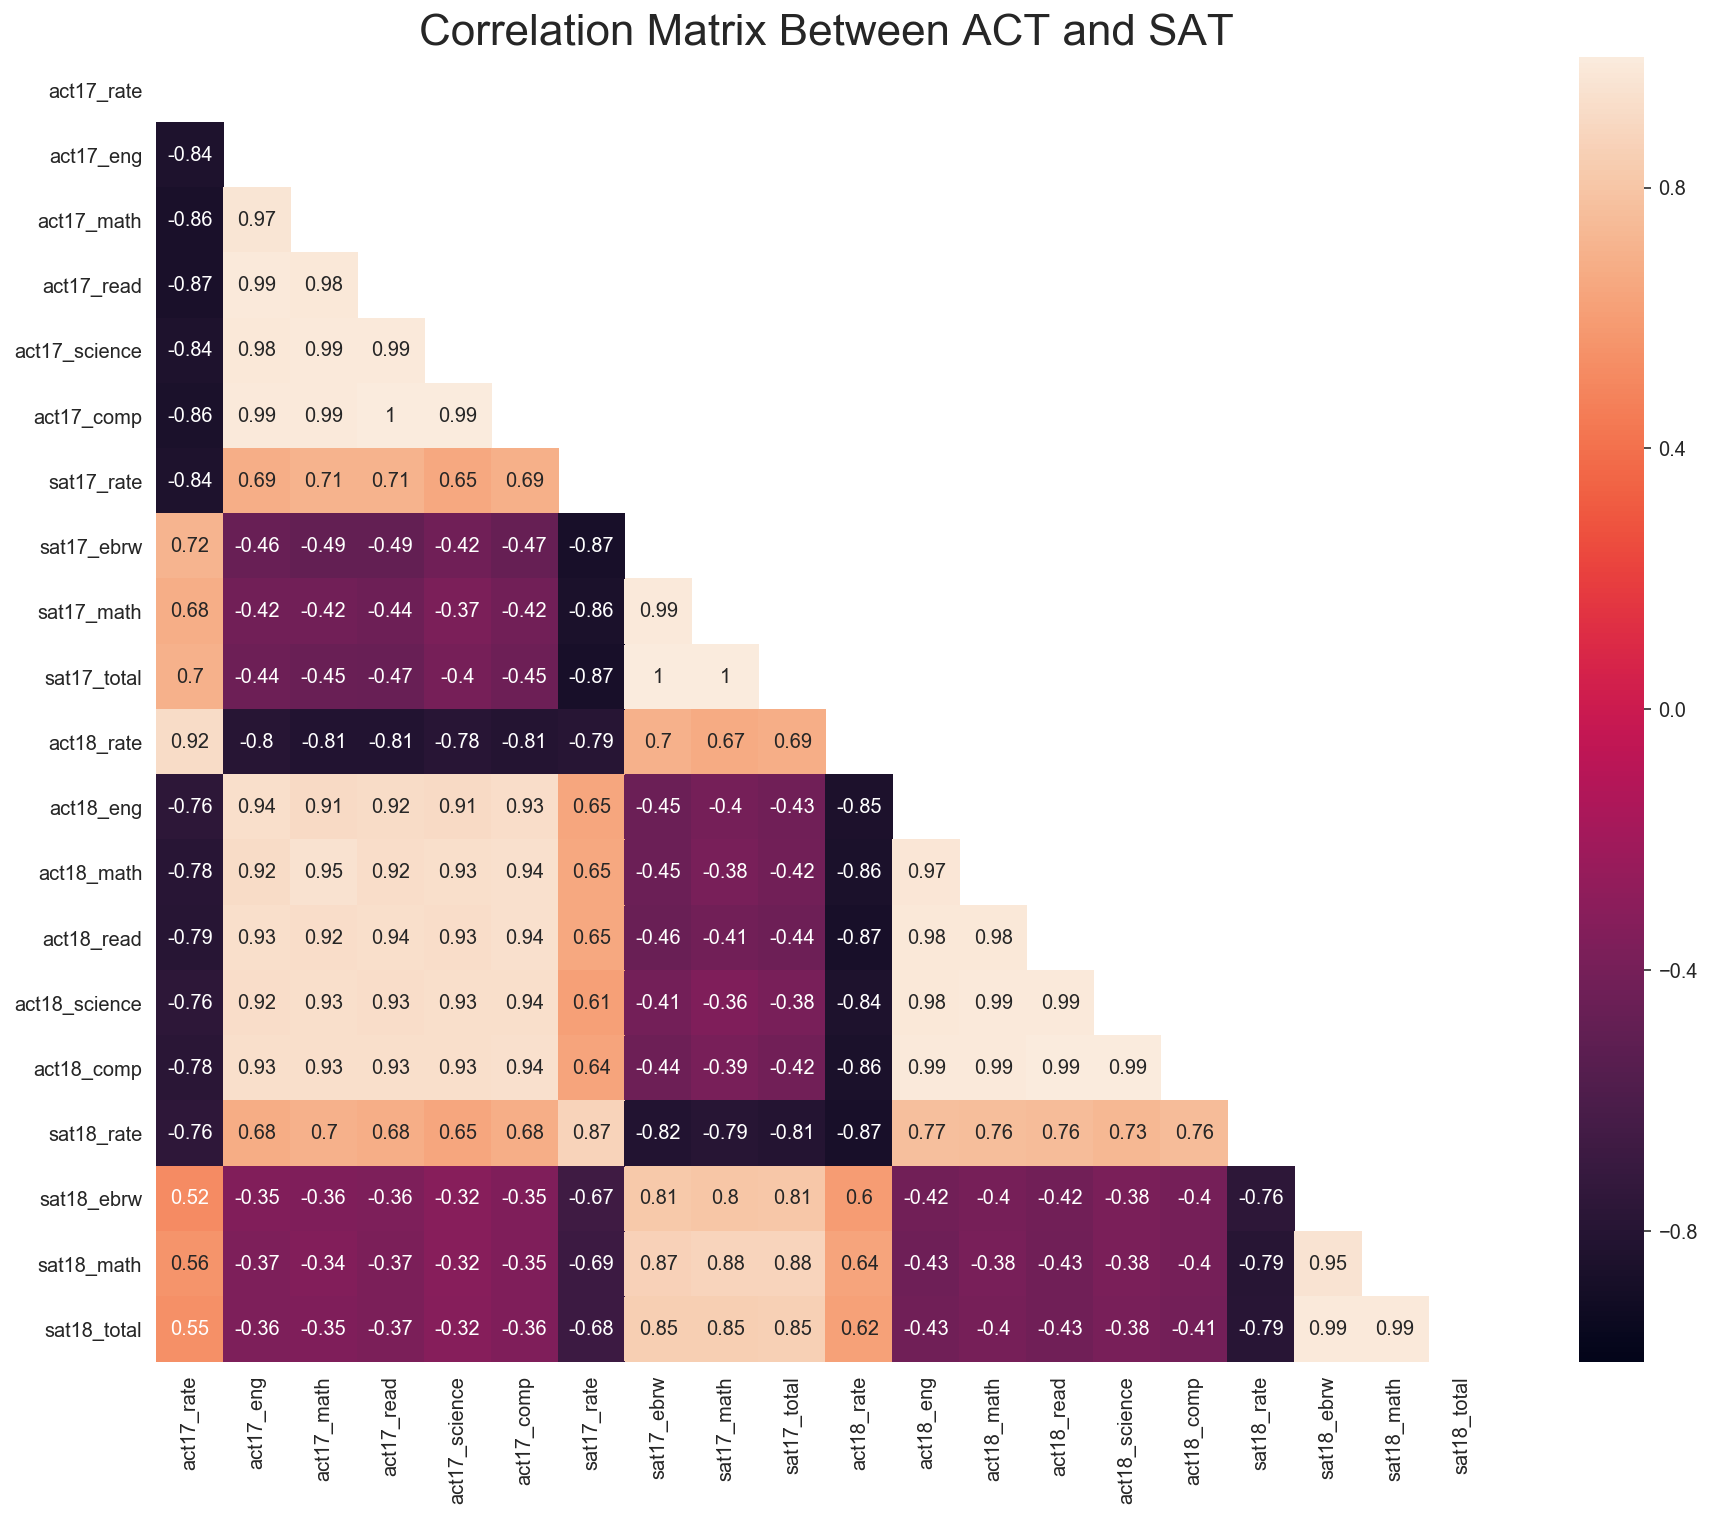

In [123]:
# Setting up the size of the figure
plt.figure(figsize=(15,12)) 
# Insert the title 
plt.title("Correlation Matrix Between ACT and SAT", fontsize=22) 
corr = df_final.corr()
# Set up mask to be True to hide upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heat_map = sns.heatmap(corr,mask=mask,annot=True,vmin=-1,vmax=1)

Looking at the correlation matrix above, we notice the below;

- Average score for SAT and ACT subjects in both 2017 and 2018 are inversely correlated with their participation rate.
- Average participation rate for ACT is inversely correlated to the average participation rate of SAT for both 2017 and 2018, which makes sense since students only need to take 1 entrance exam.
- There's a very high correlation between the average score of ACT subjects in 2017 and 2018

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [124]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, xlim, ylim):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins = 10) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i], fontsize=21)
        ax[i].set_ylabel('Number of States', fontsize=21)
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=21)
        ax[i].set_ylim(ylim[i])                 
        ax[i].set_xlim(xlim[i])                

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

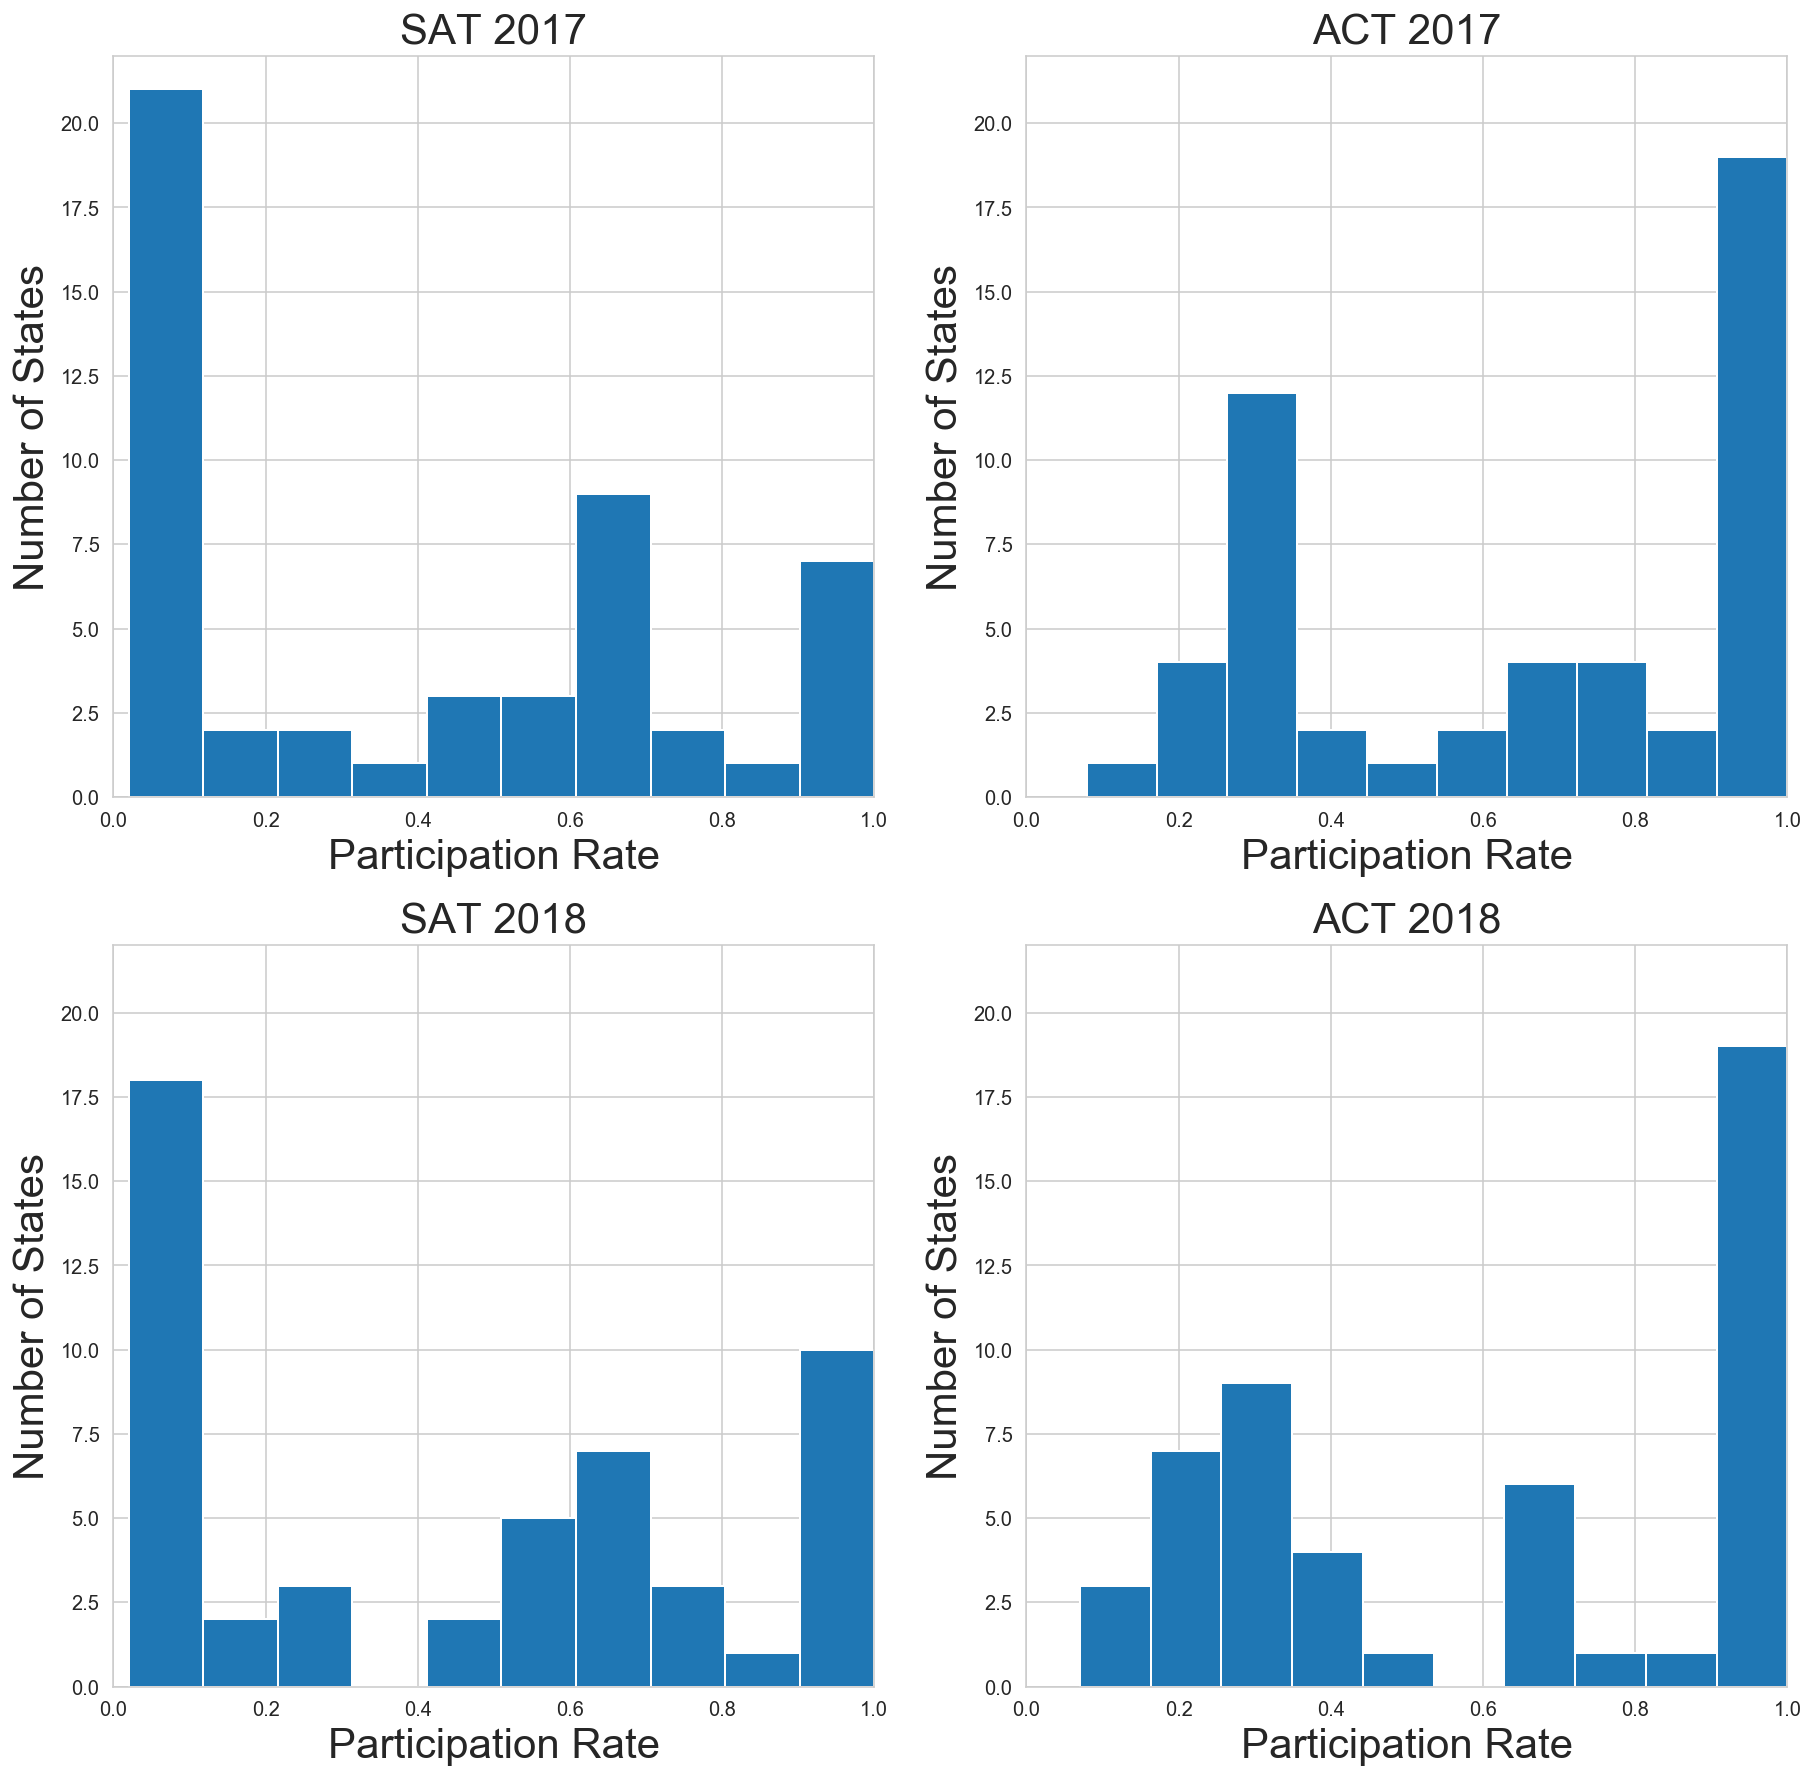

In [125]:
#Participation rates for SAT & ACT
list_of_columns = ['sat17_rate', 'act17_rate', 'sat18_rate',
                   'act18_rate']
list_of_titles = ['SAT 2017', 'ACT 2017', 'SAT 2018', 'ACT 2018']
list_of_xlabels = ['Participation Rate', 'Participation Rate', 'Participation Rate',
                   'Participation Rate']
xlim = [[0,1],[0,1],[0,1],[0,1]]
ylim = [[0,22],[0,22],[0,22],[0,22]]

subplot_histograms(df_final, list_of_columns, list_of_titles, list_of_xlabels, xlim, ylim)

Looking at the Participation rate histogram above, we notice the below;

- SAT Participation rate in 2017 and 2018 histogram is skewed to the right
- ACT Participation rate in 2017 and 2018 histogram is skewed to the left
- Compared to ACT participation rates, SAT has significantly lesser number of states with 100% participation in 2017 and 2018
- Notice an increase in the number of states with 100% participation rate in SAT while the number of states with 100% participation in ACT remained the same.

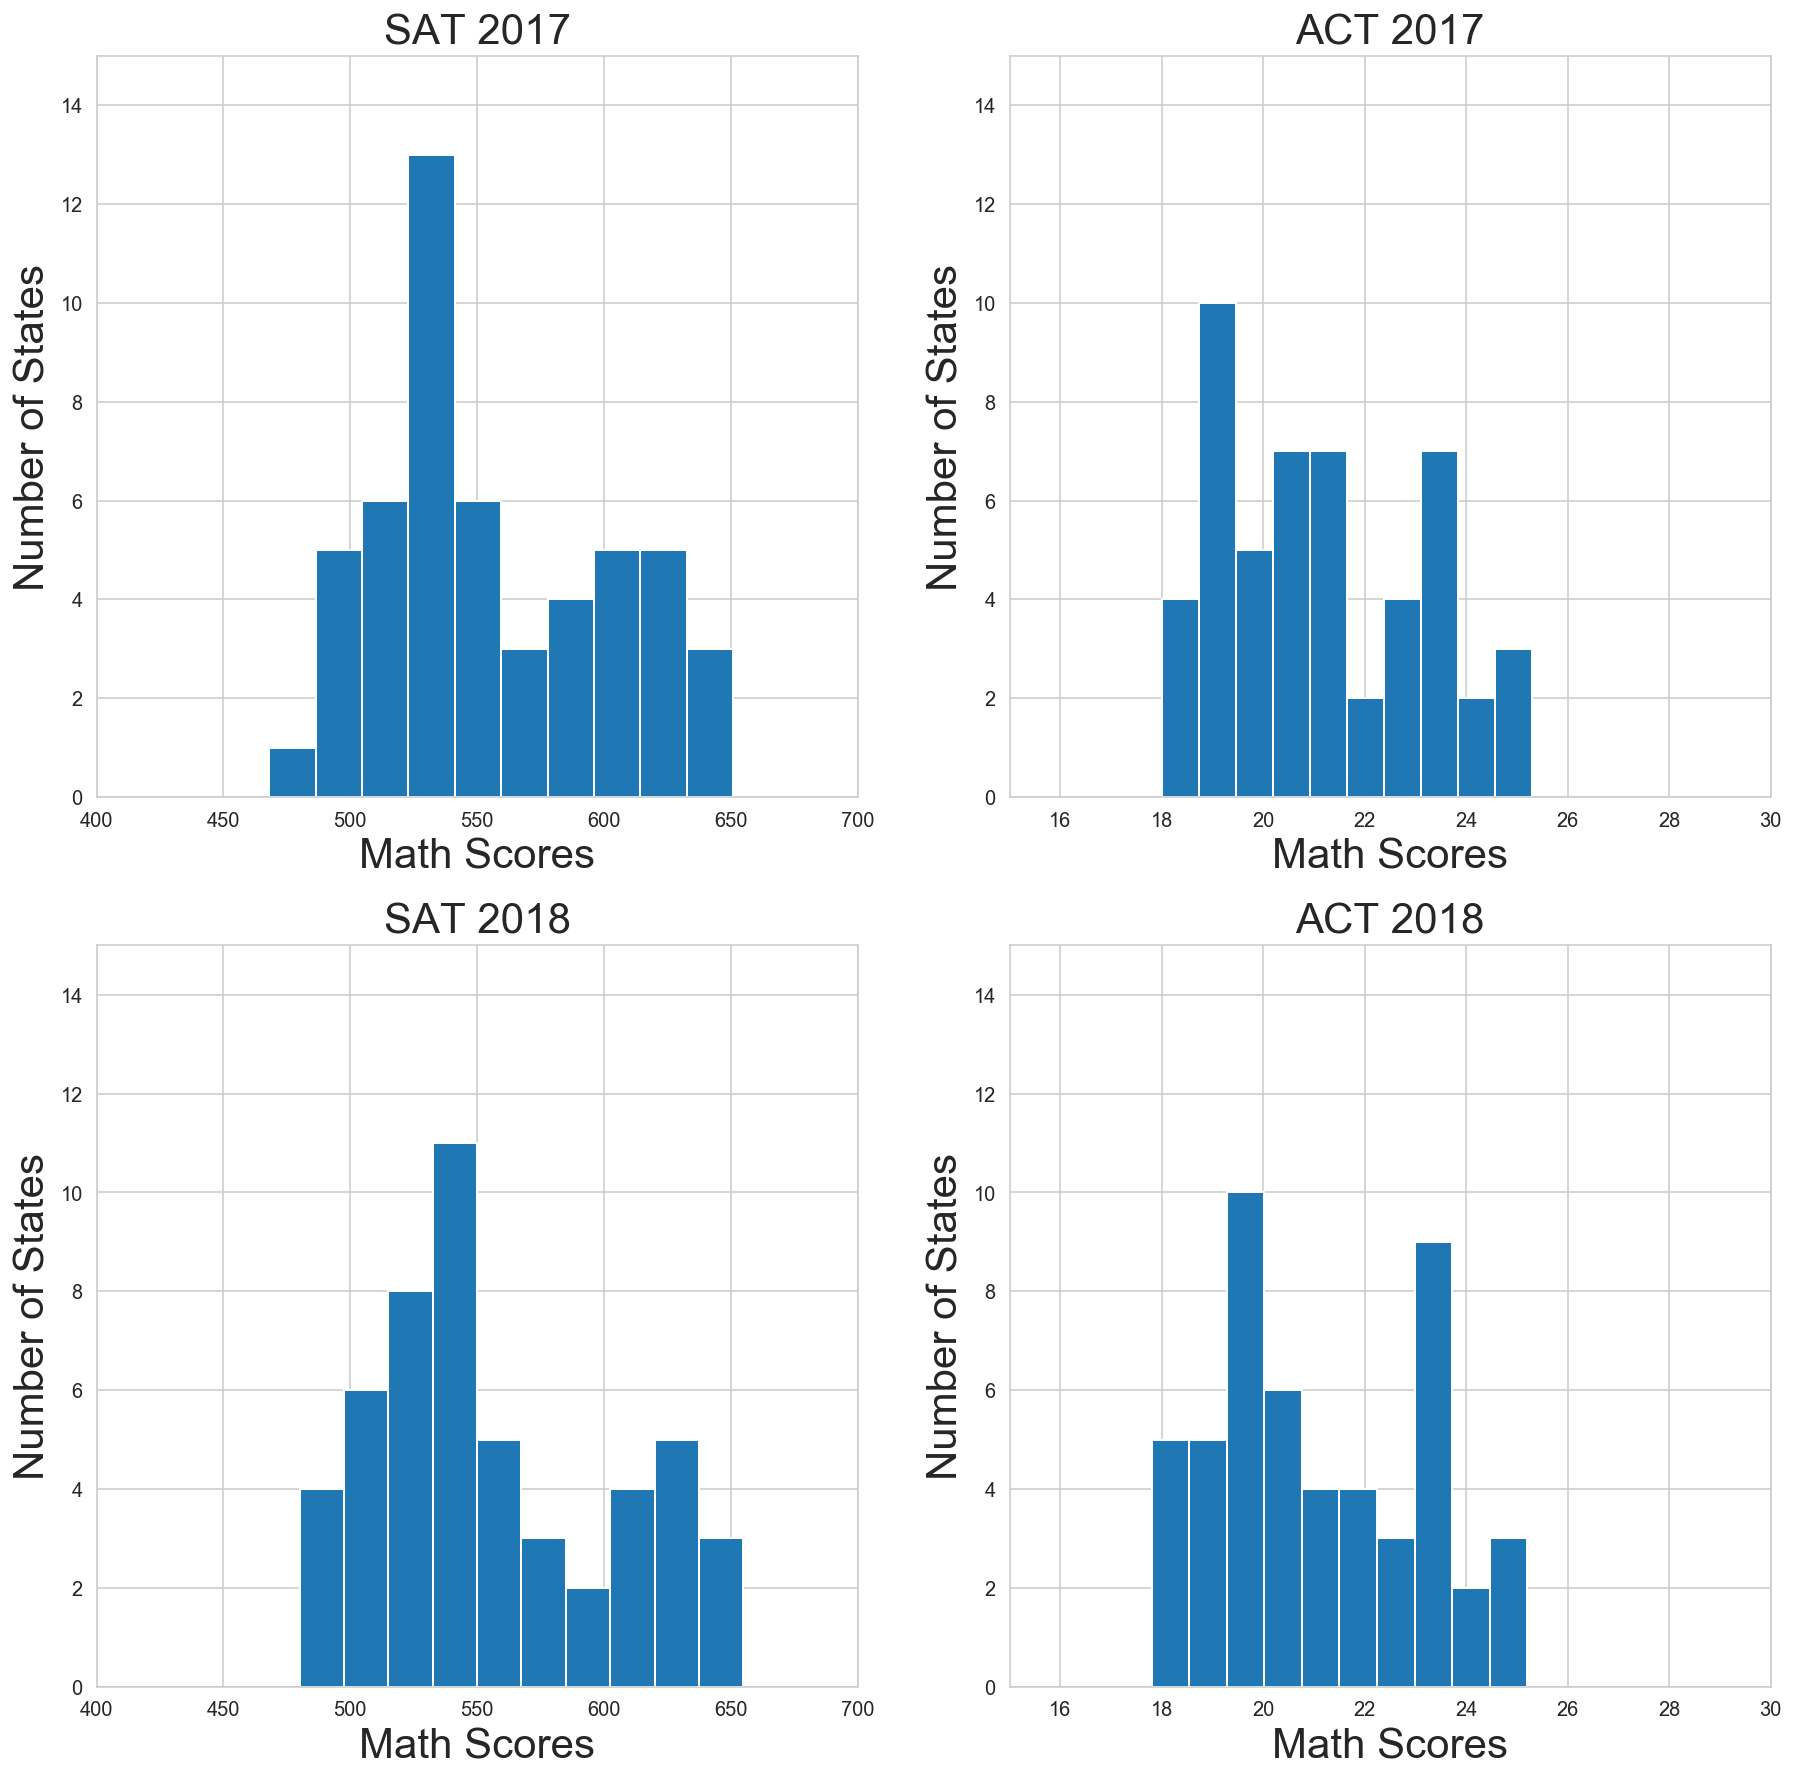

In [126]:
#Math scores for SAT & ACT
list_of_columns = ['sat17_math', 'act17_math', 'sat18_math',
                   'act18_math']
list_of_titles = ['SAT 2017', 'ACT 2017', 'SAT 2018', 'ACT 2018']
list_of_xlabels = ['Math Scores', 'Math Scores', 'Math Scores',
                   'Math Scores']
xlim = [[400,700],[15,30],[400,700],[15,30]]
ylim = [[0,15],[0,15],[0,15],[0,15]]
subplot_histograms(df_final, list_of_columns, list_of_titles, list_of_xlabels, xlim, ylim)

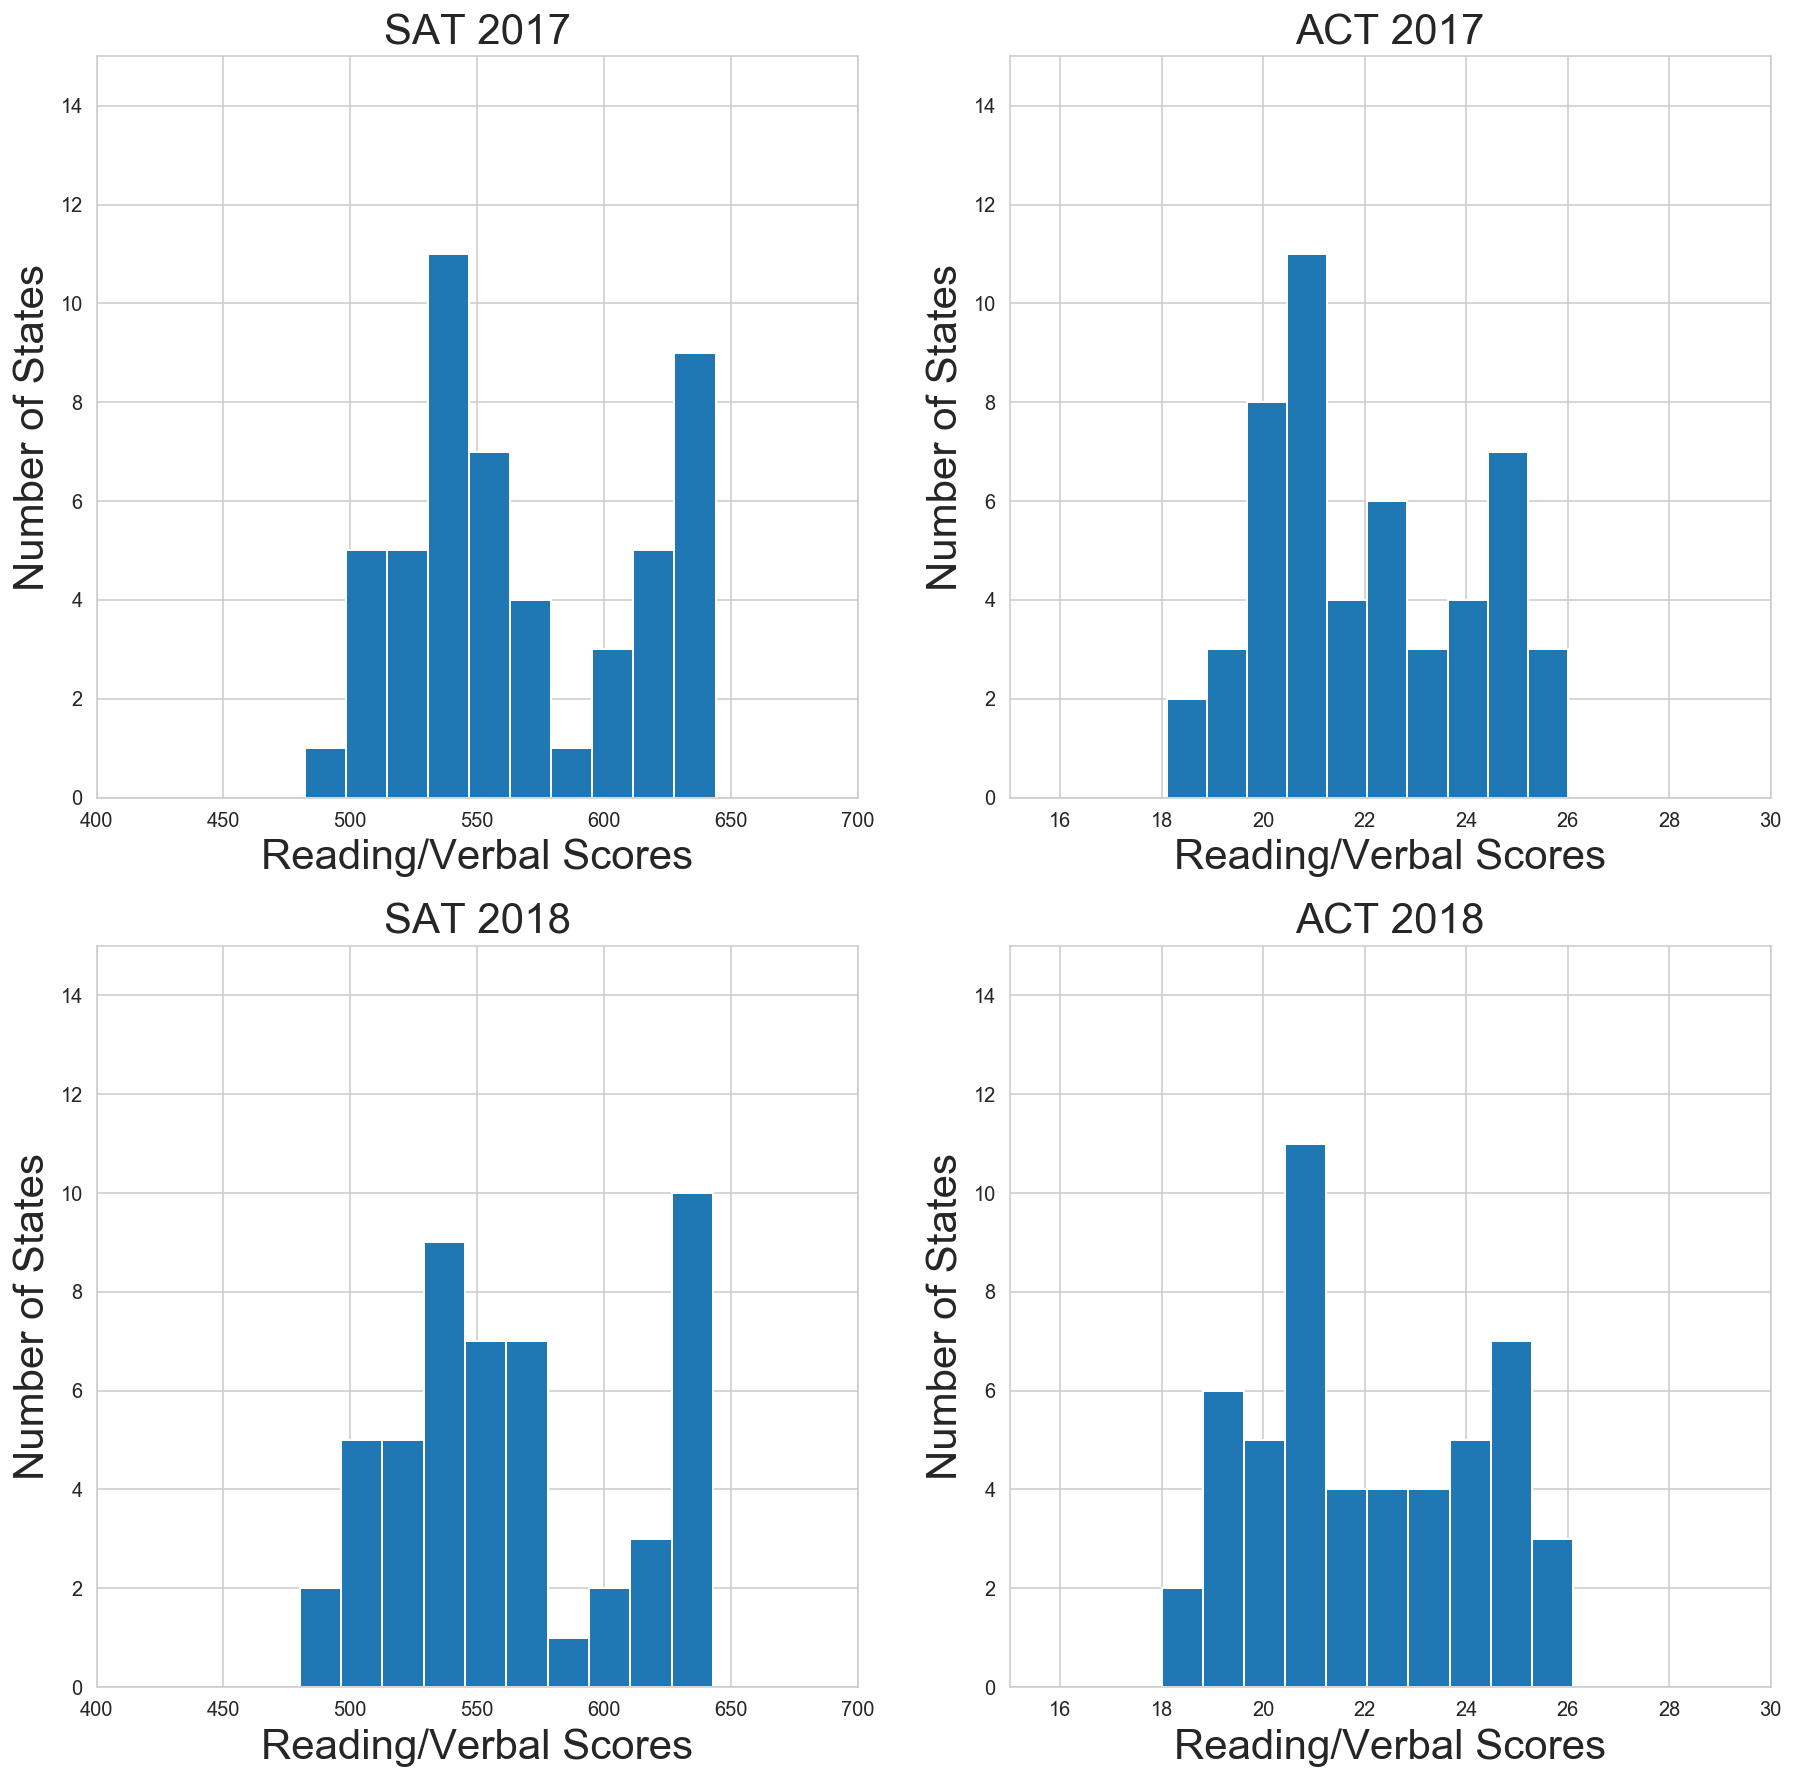

In [127]:
#Reading/verbal scores for SAT & ACT
list_of_columns = ['sat17_ebrw', 'act17_read', 'sat18_ebrw',
                   'act18_read']
list_of_titles = ['SAT 2017', 'ACT 2017', 'SAT 2018', 'ACT 2018']
list_of_xlabels = ['Reading/Verbal Scores', 'Reading/Verbal Scores', 'Reading/Verbal Scores',
                   'Reading/Verbal Scores']
xlim = [[400,700],[15,30],[400,700],[15,30]]
ylim = [[0,15],[0,15],[0,15],[0,15]]
subplot_histograms(df_final, list_of_columns, list_of_titles, list_of_xlabels, xlim, ylim)

Looking at the Math and Reading/Verbal scores histogram above, we notice the below;

- There's an increase in the average ACT maths score from 2017 to 2018
- While the average SAT maths score saw a decline in 2018 compared to 2017
- Overall,the average score (math and reading/verbal) the histogram for both 2017 and 2018 is more centrally distributed compared to participation rates

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [128]:
def scatter_plot(dataframe, x_val, y_val, list_of_titles, list_of_xlabels, list_of_ylabels, xlim, ylim):
    # You'll want to specify your figsize
    fig, ax = plt.subplots(1, 1, figsize = (15,7))
    # Set titles, labels, etc here for each subplot
    ax.scatter(x=dataframe[x_val],y=dataframe[y_val], s = 50)
    ax.set_title(list_of_titles[0], fontsize = 20)
    ax.set_ylabel(list_of_ylabels[0], fontsize = 16)
    ax.set_xlabel(list_of_xlabels[0], fontsize = 16)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.set_xlim(xlim[0])
    ax.set_ylim(ylim[0])

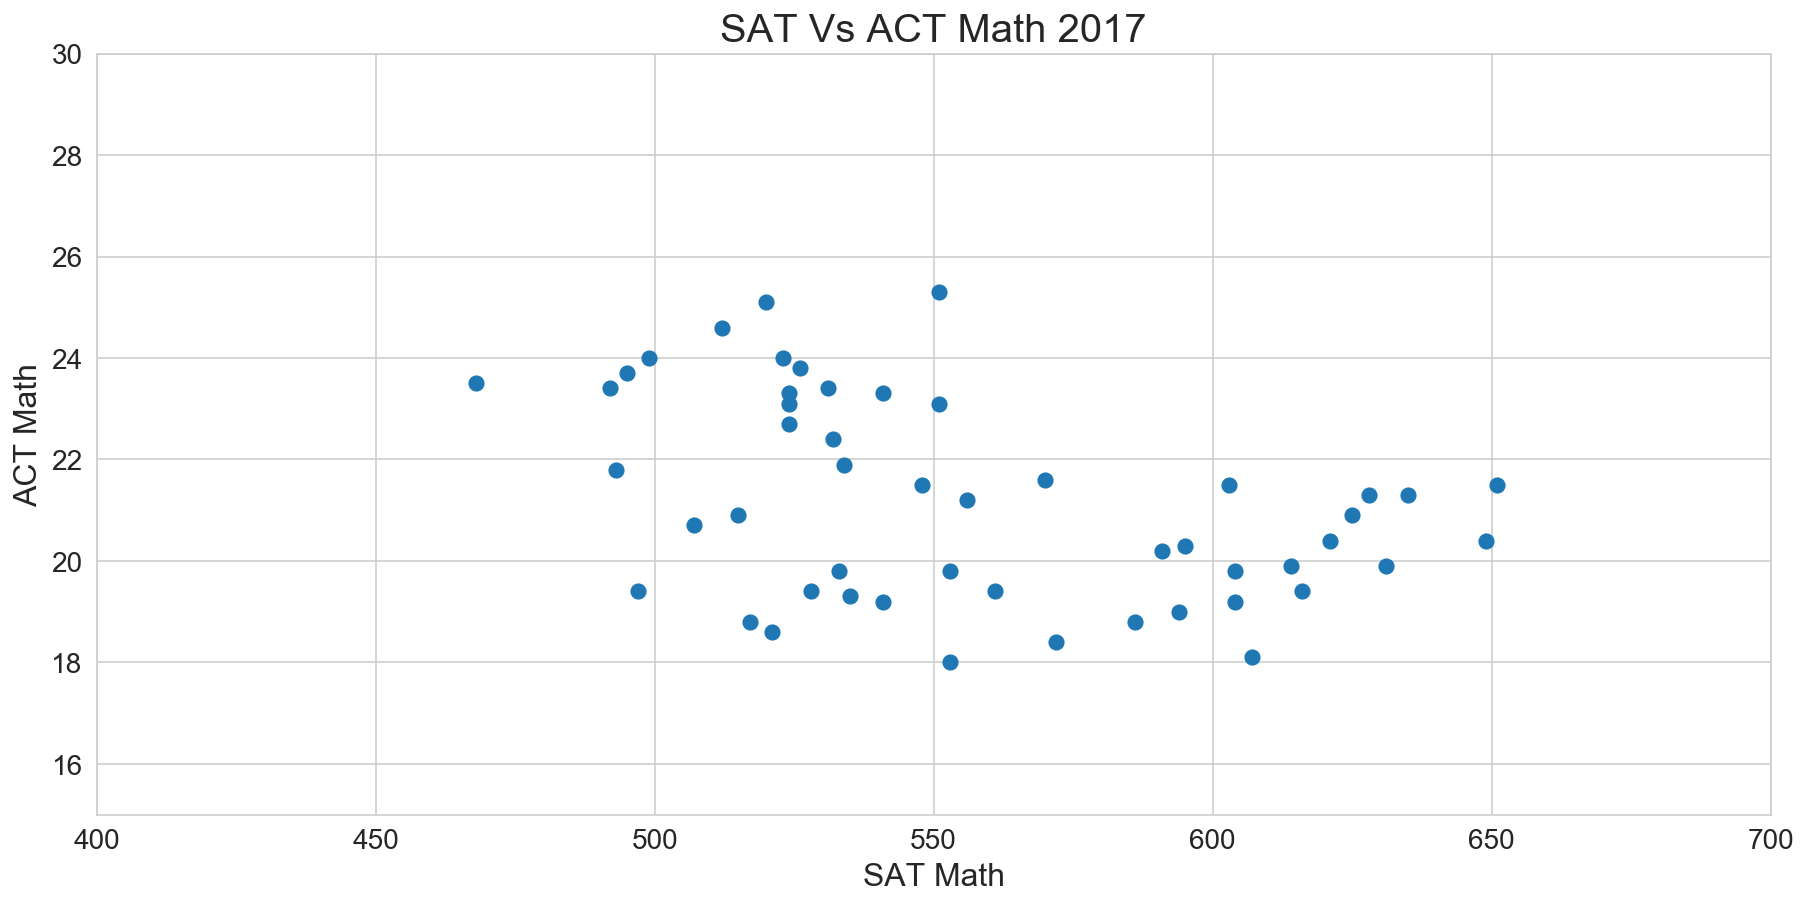

In [154]:
#SAT vs. ACT math scores for 2017
list_of_columns = ['act17_math']
list_of_rows = ['sat17_math']
list_of_titles = ['SAT Vs ACT Math 2017']
list_of_xlabels = ['SAT Math']
list_of_ylabels = ['ACT Math']
xlim = [[400,700]]
ylim = [[15,30]]
scatter_plot(df_final, list_of_rows, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels, xlim, ylim)

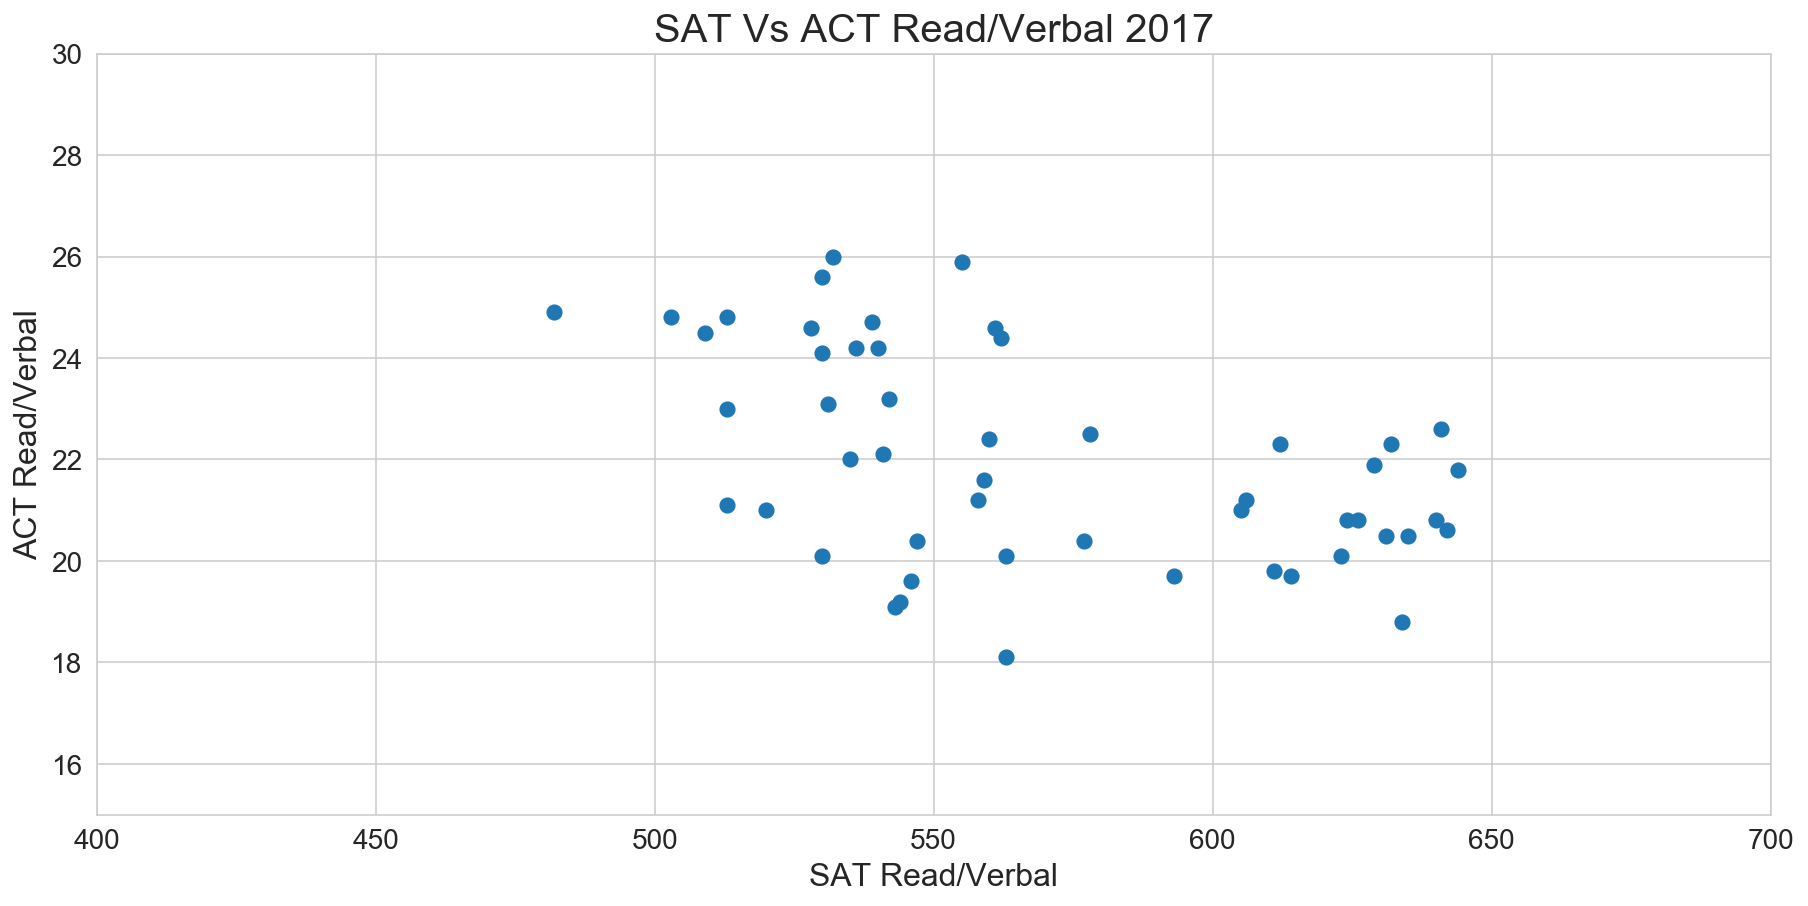

In [153]:
#SAT vs. ACT verbal/reading scores for 2017
list_of_columns = ['act17_read']
list_of_rows = ['sat17_ebrw']
list_of_titles = ['SAT Vs ACT Read/Verbal 2017']
list_of_xlabels = ['SAT Read/Verbal']
list_of_ylabels = ['ACT Read/Verbal']
xlim = [[400,700]]
ylim = [[15,30]]
scatter_plot(df_final, list_of_rows, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels, xlim, ylim)

Both scatter plots on Math and Read/Verbal

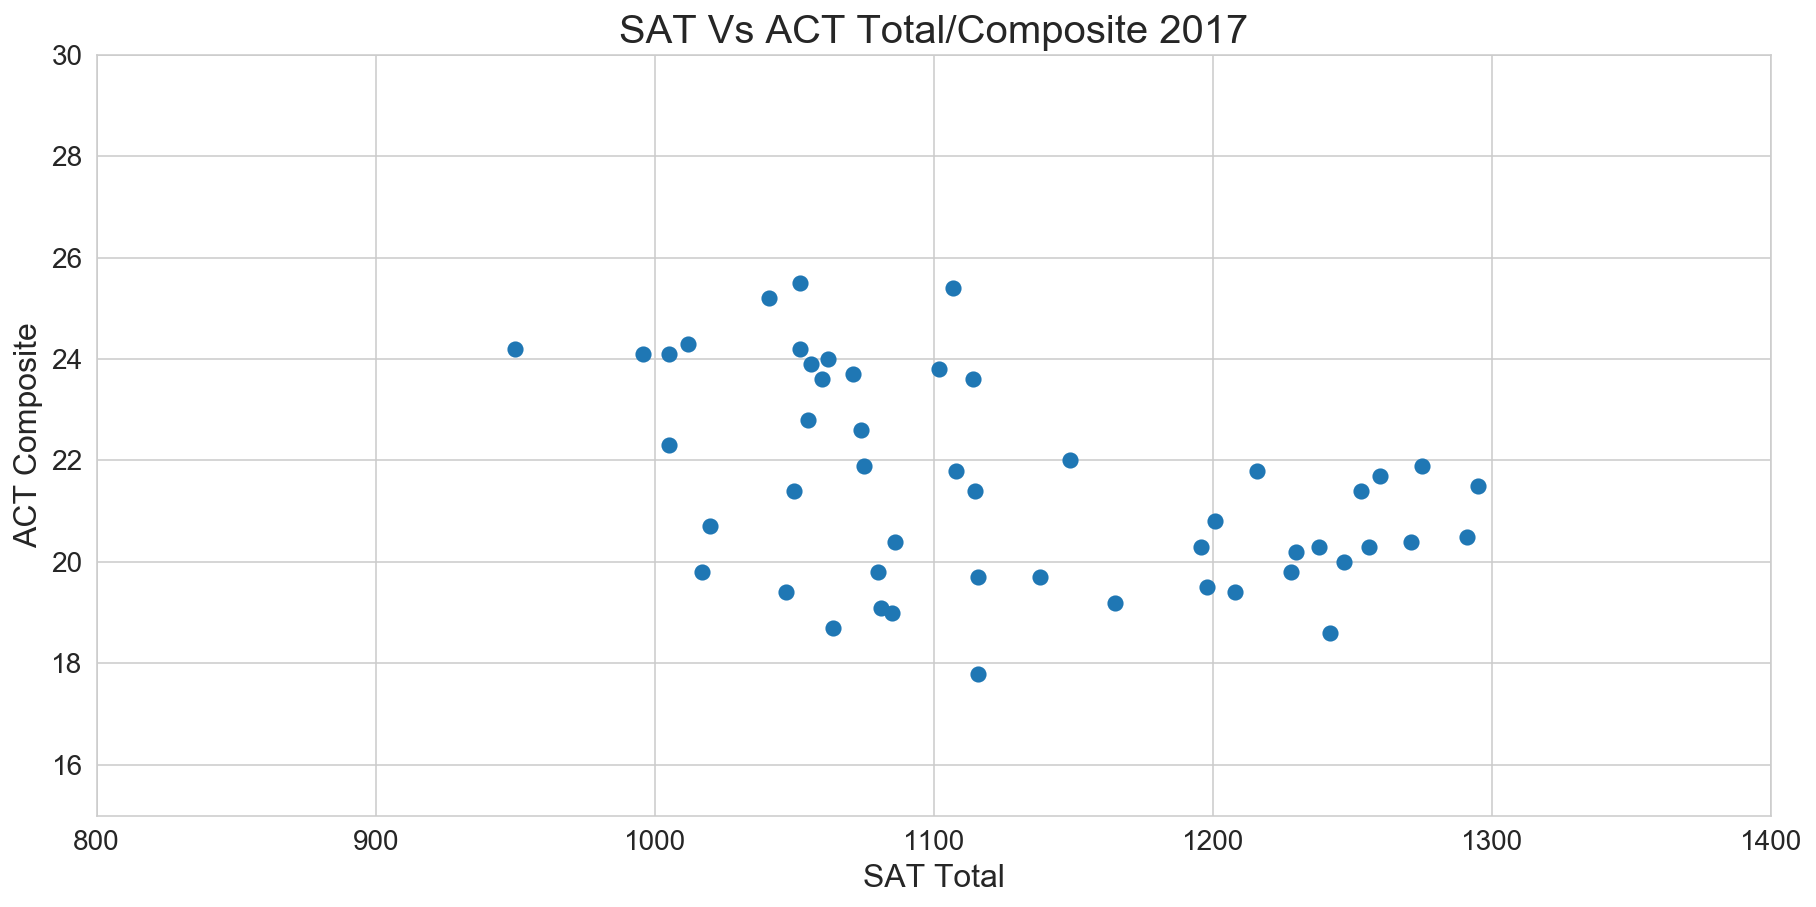

In [131]:
#SAT vs. ACT total/composite scores for 2017
list_of_columns = ['act17_comp']
list_of_rows = ['sat17_total']
list_of_titles = ['SAT Vs ACT Total/Composite 2017']
list_of_xlabels = ['SAT Total']
list_of_ylabels = ['ACT Composite']
xlim = [[800,1400]]
ylim = [[15,30]]
scatter_plot(df_final, list_of_rows, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels, xlim, ylim)

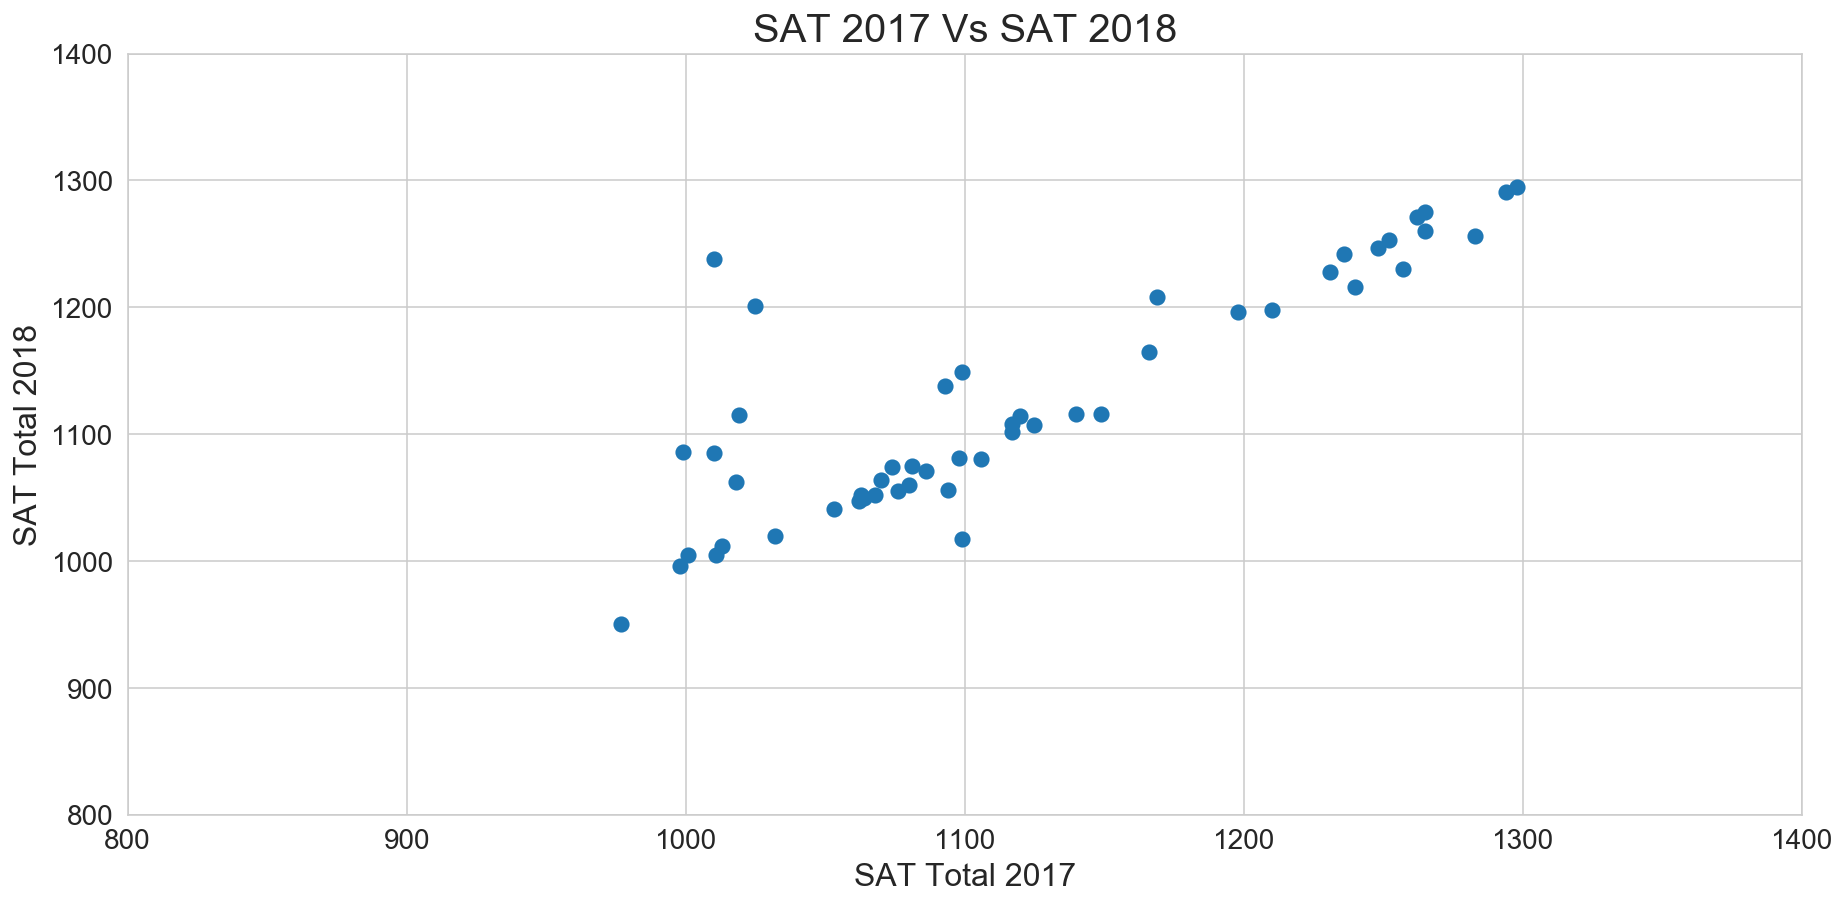

In [134]:
#Total scores for SAT 2017 vs. 2018
list_of_columns = ['sat17_total']
list_of_rows = ['sat18_total']
list_of_titles = ['SAT 2017 Vs SAT 2018']
list_of_xlabels = ['SAT Total 2017']
list_of_ylabels = ['SAT Total 2018']
xlim = [[800,1400]]
ylim = [[800,1400]]
scatter_plot(df_final, list_of_rows, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels, xlim, ylim)

Looking at the SAT Total scatter plot for 2017 and 2018, we notice;

- Apart from a few outliers, there's an uphill pattern which means a postive slope.
- This shows there's a linear relationship between the SAT Total Score in 2017 and 2018.

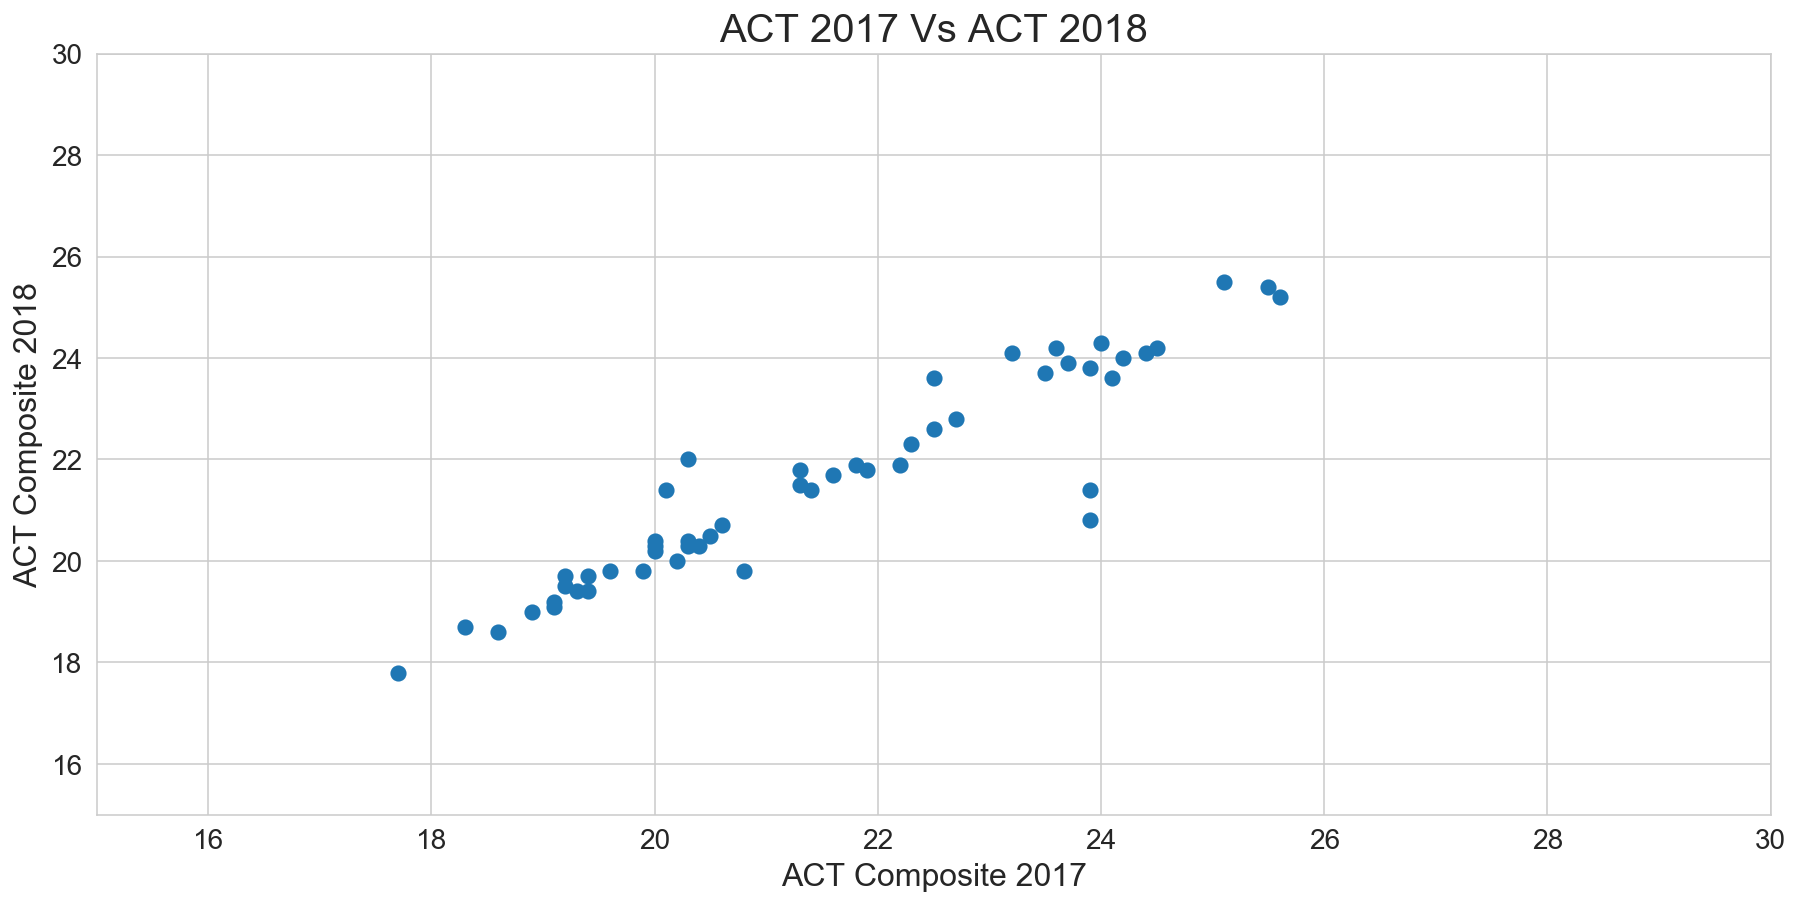

In [135]:
#Composite scores for ACT 2017 vs. 2018
list_of_columns = ['act17_comp']
list_of_rows = ['act18_comp']
list_of_titles = ['ACT 2017 Vs ACT 2018']
list_of_xlabels = ['ACT Composite 2017']
list_of_ylabels = ['ACT Composite 2018']
xlim = [[15,30]]
ylim = [[15,30]]
scatter_plot(df_final, list_of_rows, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels, xlim, ylim)

Looking at the ACT Composite scatter plot for 2017 and 2018, we notice;

- Apart from a few outliers, there's an uphill pattern that suggest a postive slope.
- This shows there's a linear relationship between the ACT Composite Score in 2017 and 2018

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

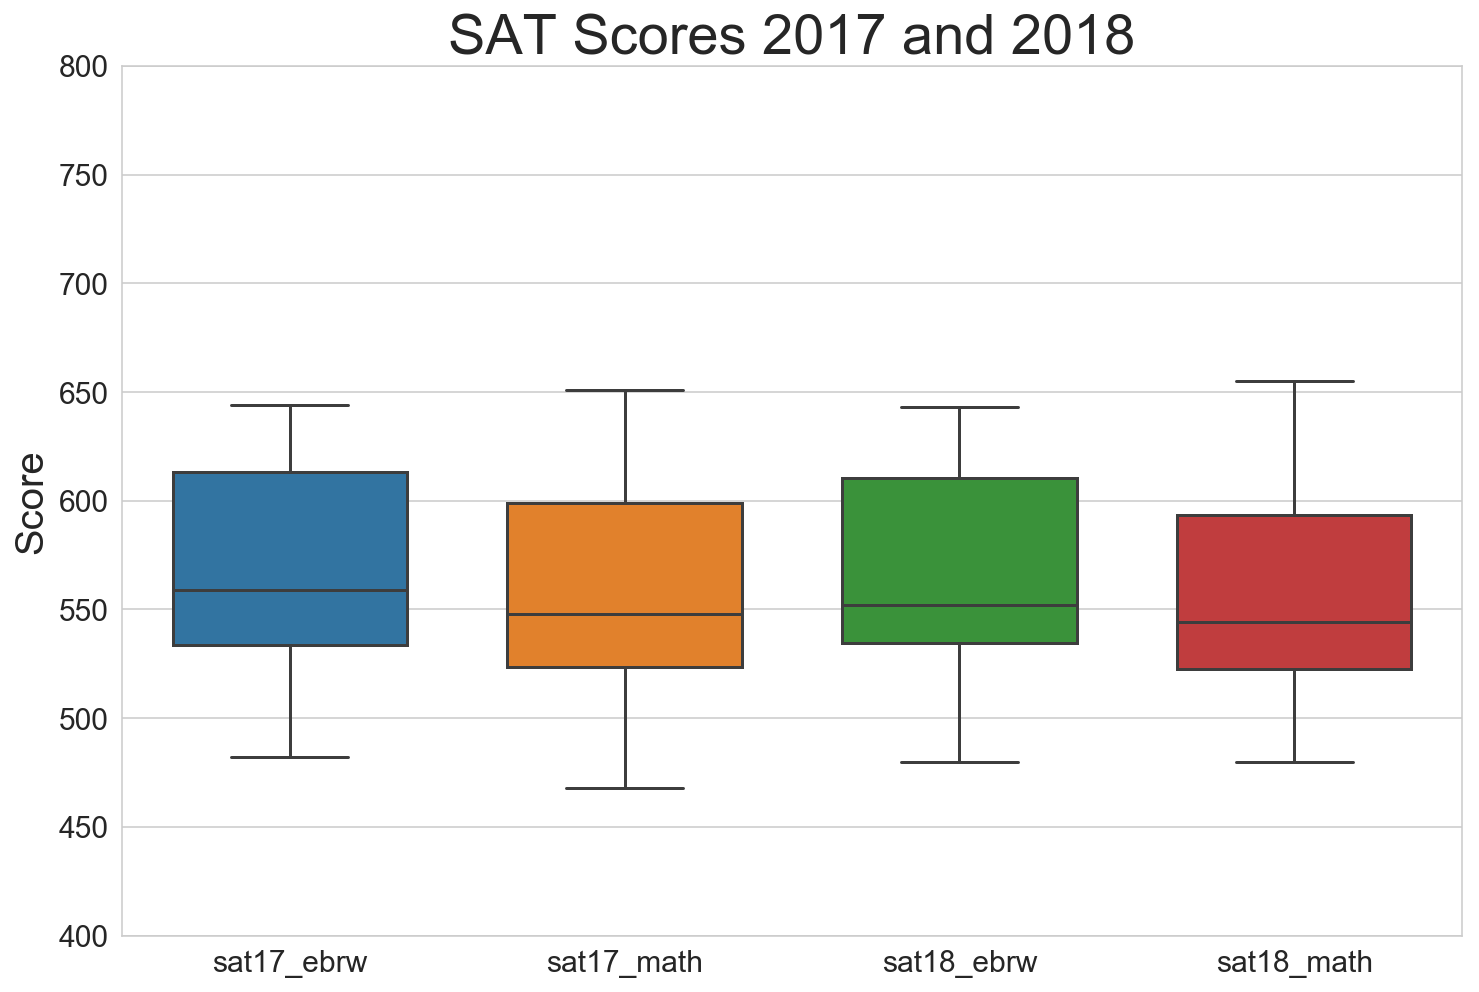

In [136]:
# Box plot Sat Scores 2017 and 2018
ax = plt.subplots(figsize=(12,8))
plt.title('SAT Scores 2017 and 2018', fontsize=28)
plt.ylabel('Score', fontsize=20)
plt.xlabel('', fontsize=22)
plt.ylim(400, 800)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.boxplot(data=df_final[['sat17_ebrw','sat17_math', 'sat18_ebrw', 
                       'sat18_math']], width=0.7)

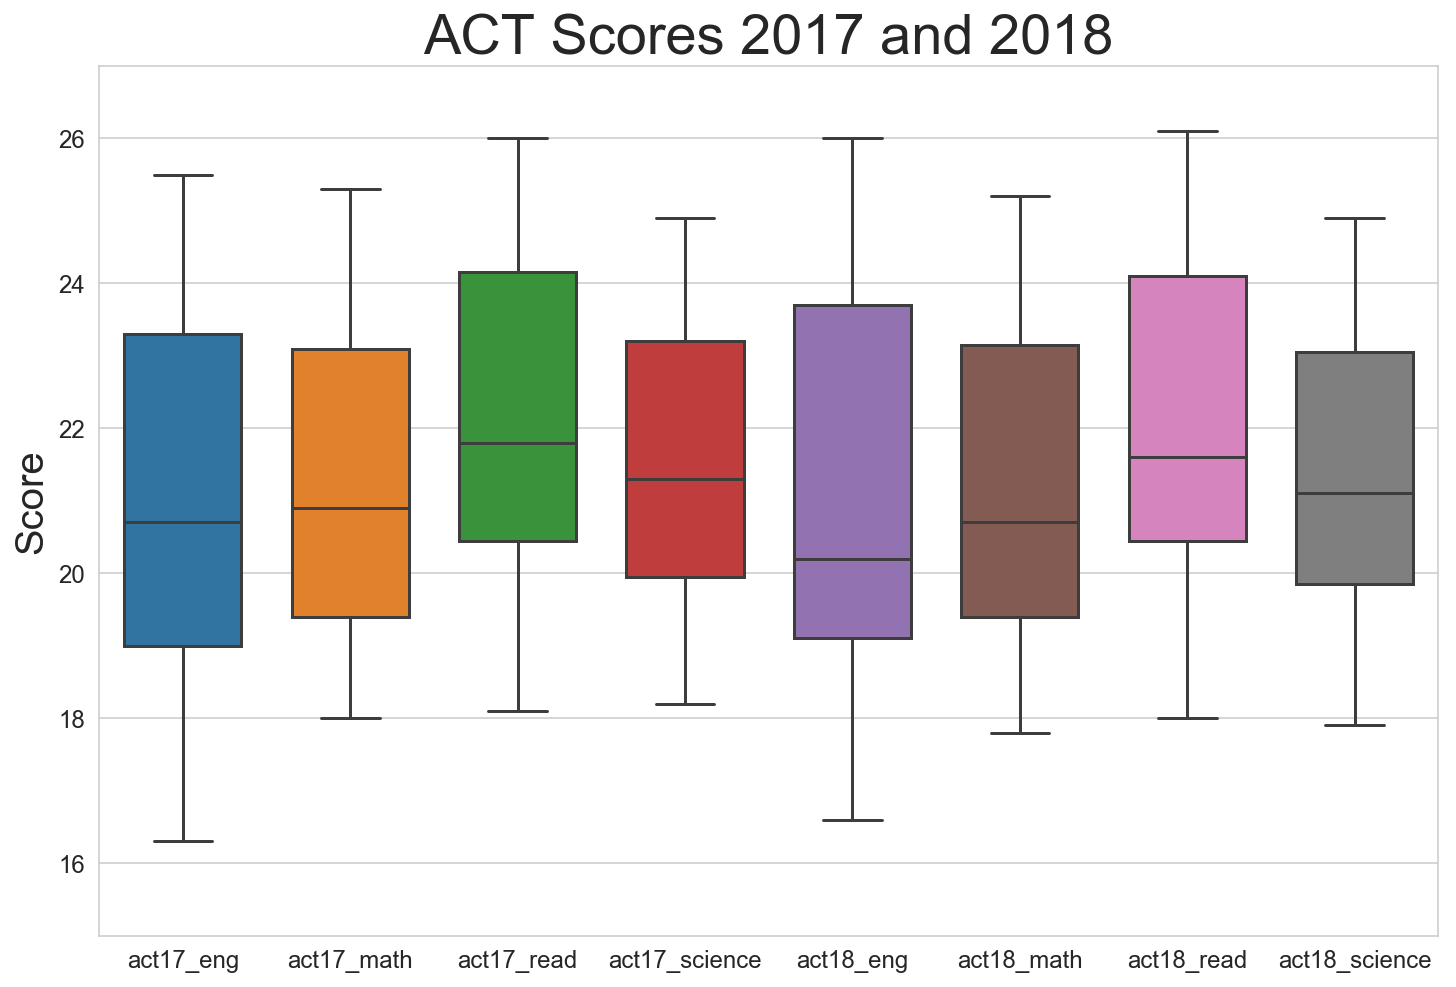

In [137]:
# Box plot Act Scores 2017 and 2018
ax = plt.subplots(figsize=(12,8))
plt.title('ACT Scores 2017 and 2018', fontsize=28)
plt.ylabel('Score', fontsize=20)
plt.ylim(15, 27)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(data=df_final[['act17_eng', 'act17_math', 'act17_read', 
                       'act17_science', 'act18_eng', 'act18_math', 'act18_read', 'act18_science']]
            , width=0.7)

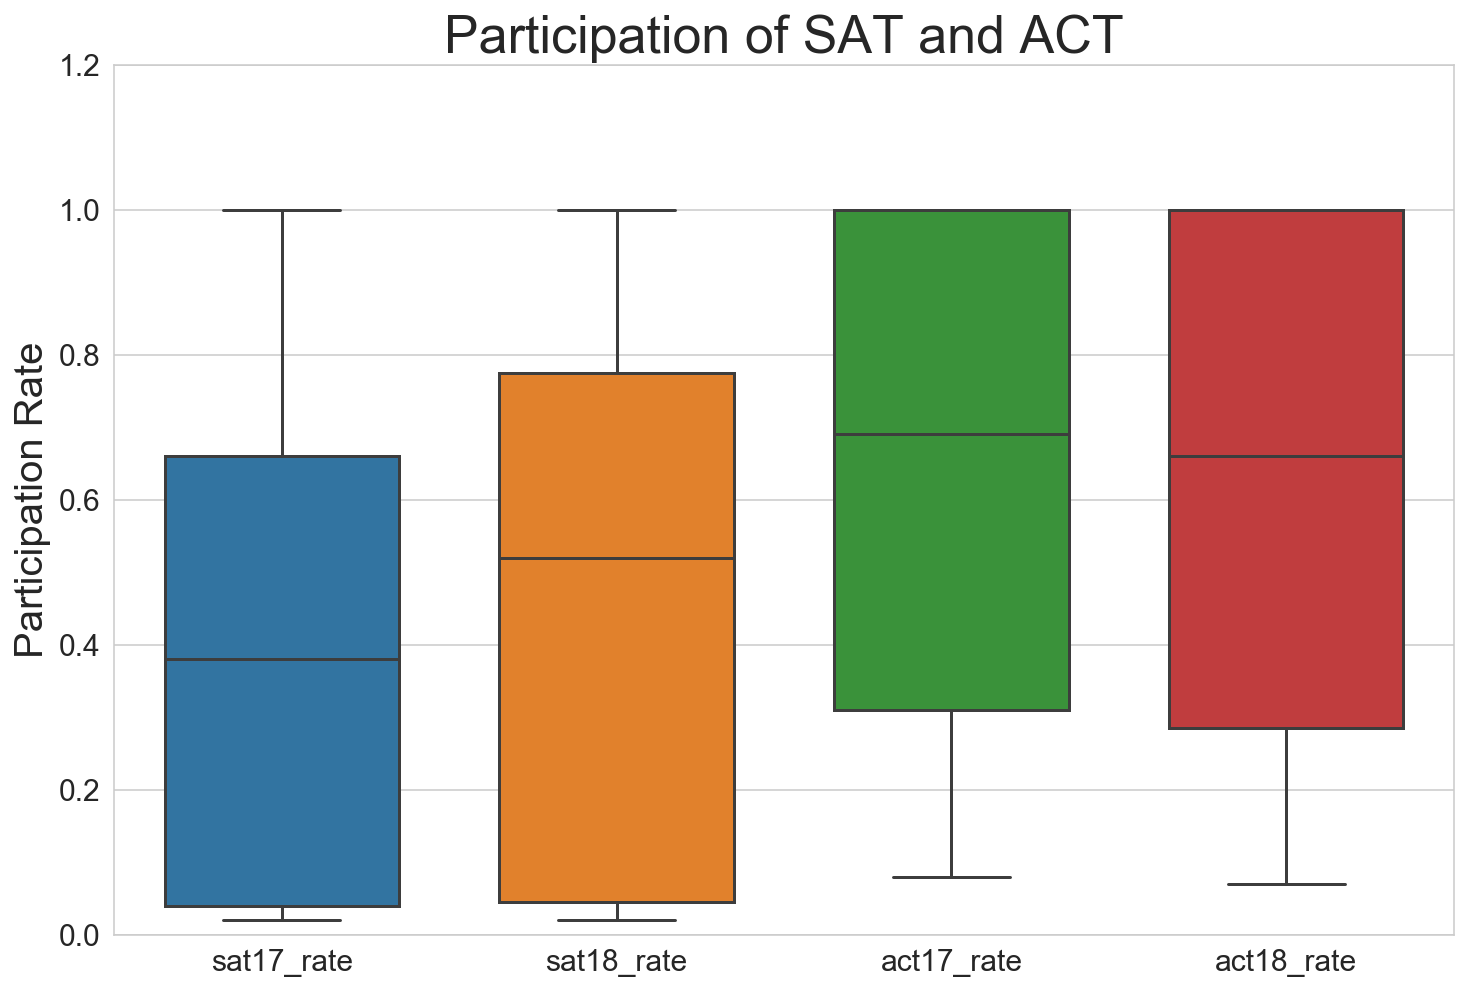

In [138]:
# Box plot Participation Rate
ax = plt.subplots(figsize=(12,8))
plt.title('Participation of SAT and ACT', fontsize=26)
plt.ylabel('Participation Rate', fontsize=20)
plt.ylim(0, 1.2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.boxplot(data=df_final[['sat17_rate', 'sat18_rate', 'act17_rate', 
                       'act18_rate']], width=0.7)

Looking at the Participation rate boxplot for SAT and ACT above, we notice;

- An increase in the median and IQR of SAT participation rate from 2017 to 2018
- While ACT participation sees a slight decrease in participation rate in 2018 compared to 2017

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [141]:
# Import median income per state
med_income = pd.read_csv('../data/median_income.csv')
# Combine median income data with final datasets
data_income = pd.merge(df_final, med_income, on='state')
data_income.head()

,state,act17_rate,act17_eng,act17_math,act17_read,act17_science,act17_comp,sat17_rate,sat17_ebrw,sat17_math,...,act18_math,act18_read,act18_science,act18_comp,sat18_rate,sat18_ebrw,sat18_math,sat18_total,median_income18,median_income17
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,18.3,19.6,19.0,19.1,0.06,595,571,1166,"49,861.00","48,123.00"
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,...,20.6,21.6,20.7,20.8,0.43,562,544,1106,"74,346.00","73,181.00"
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,...,19.4,19.5,19.2,19.2,0.29,577,572,1149,"59,246.00","56,581.00"
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,...,18.9,19.7,19.4,19.4,0.05,592,576,1169,"47,062.00","45,869.00"
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,...,22.5,23.0,22.1,22.7,0.60,540,536,1076,"75,277.00","71,805.00"


In [142]:
# Check for additional rows or columns
# Check the data type for median_income17 and median_income18
data_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 23 columns):
state              51 non-null object
act17_rate         51 non-null float64
act17_eng          51 non-null float64
act17_math         51 non-null float64
act17_read         51 non-null float64
act17_science      51 non-null float64
act17_comp         51 non-null float64
sat17_rate         51 non-null float64
sat17_ebrw         51 non-null int64
sat17_math         51 non-null int64
sat17_total        51 non-null int64
act18_rate         51 non-null float64
act18_eng          51 non-null float64
act18_math         51 non-null float64
act18_read         51 non-null float64
act18_science      51 non-null float64
act18_comp         51 non-null float64
sat18_rate         51 non-null float64
sat18_ebrw         51 non-null int64
sat18_math         51 non-null int64
sat18_total        51 non-null int64
median_income18    51 non-null object
median_income17    51 non-null object
dtypes: float64

In [143]:
#Noted median income column for 2017 and 2018 are object, remove string
data_income['median_income17'] = data_income['median_income17'].map(lambda part: part.replace(',',''))
data_income['median_income18'] = data_income['median_income18'].map(lambda part: part.replace(',',''))
#Changed datatype to float
data_income['median_income17'] = data_income['median_income17'].astype(float)
data_income['median_income18'] = data_income['median_income18'].astype(float)

In [146]:
# Check the column to ensure format is correct
print(data_income['median_income17'].dtypes)
print(data_income['median_income18'].dtypes)

float64
float64


Text(0, 0.5, 'Median Income')

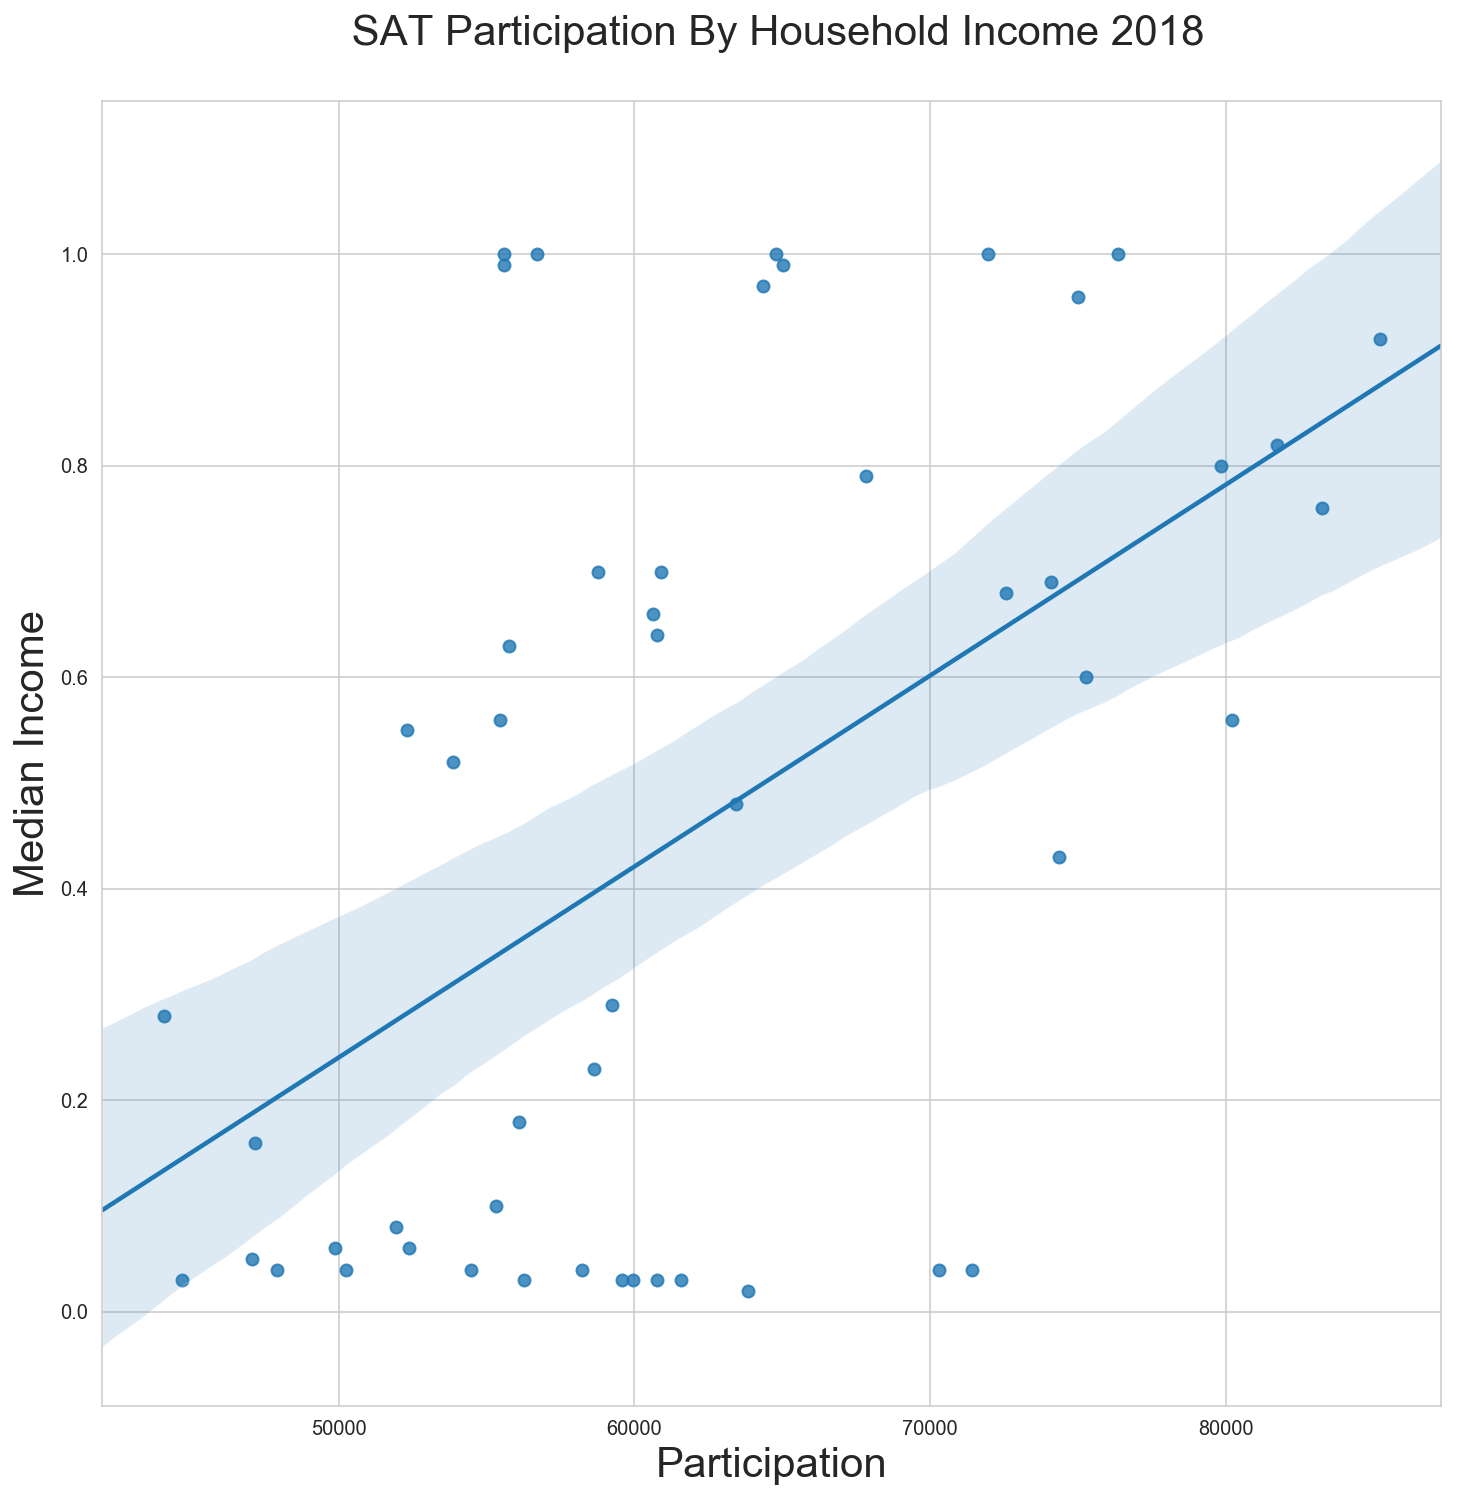

In [148]:
x = plt.subplots(figsize = (12,12))
x = sns.regplot(y= 'sat18_rate', x= 'median_income18', 
                data=data_income[['median_income18', 'sat18_rate']])
x.set_title(' SAT Participation By Household Income 2018\n', fontsize=21)
x.set_xlabel('Participation', fontsize=21)
x.set_ylabel('Median Income', fontsize=21)

Text(0, 0.5, 'Median Income')

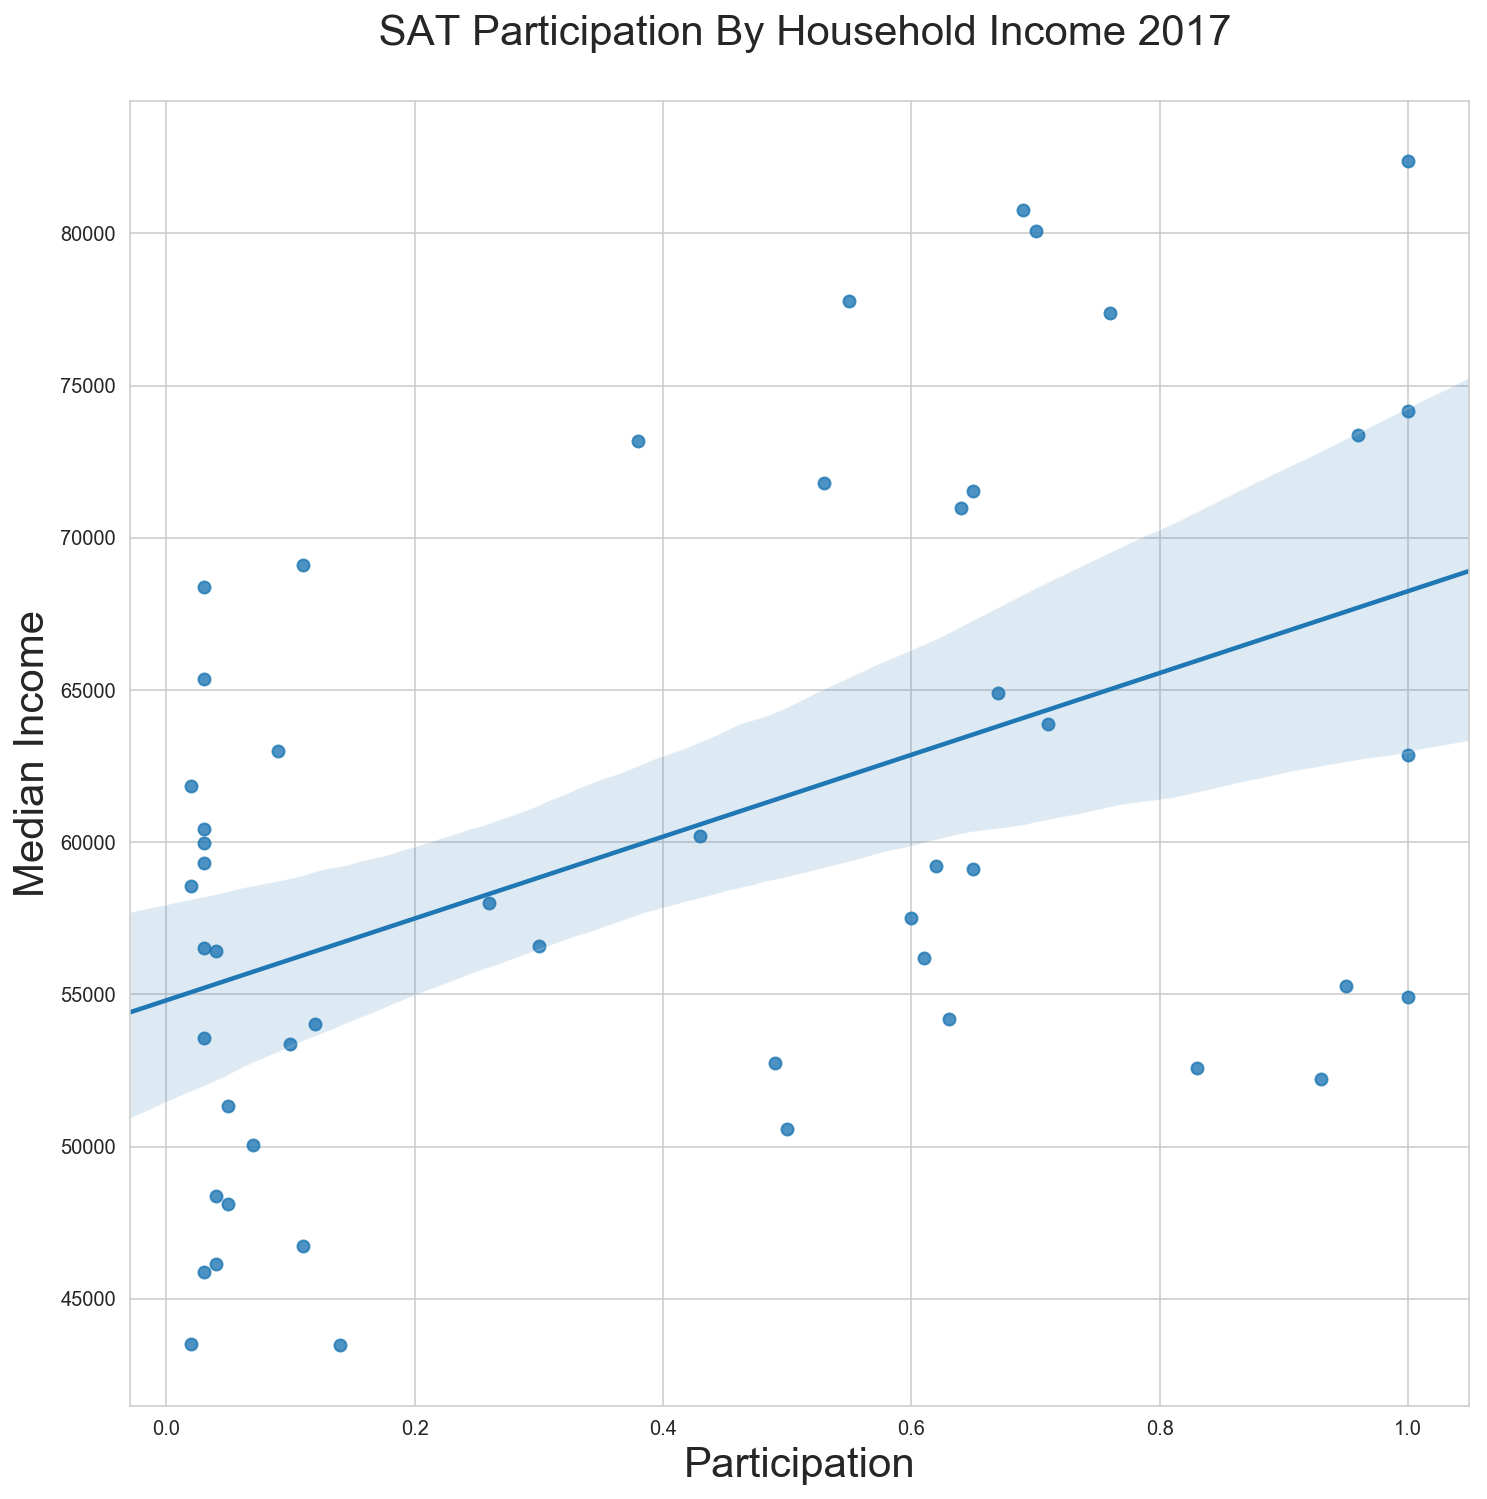

In [151]:
x = plt.subplots(figsize = (12,12))
x = sns.regplot(y= 'median_income17', x= 'sat17_rate', 
                data=data_income[['median_income17', 'sat17_rate']])
x.set_title(' SAT Participation By Household Income 2017\n', fontsize=21)
x.set_xlabel('Participation', fontsize=21)
x.set_ylabel('Median Income', fontsize=21)

Included the median household income by state for 2017 and 2018.
Point of the scatter plot is to see the correlation between high school children from low income families and the SAT participation rate.
Year over year, we notice the income of each household plays an important factor in the participation rate of the SAT entrance exams as from the scatter plot above we see both 2017 and 2018 skewed to the right.
The lower the household income the particpation rate will decline further.


#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [152]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
act17_rate,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act17_eng,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act17_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act17_read,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act17_science,51.0,21.462745,1.753392,18.20,19.950,21.30,23.200,24.9
act17_comp,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5
sat17_rate,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat17_ebrw,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat17_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat17_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


- SAT 2017 Participation Rate: Right Skewed
- SAT 2018 Participation Rate: Left Skewed
- Rest of the ACT and SAT Features for 2017 and 2018: Bimodal


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer: No, as per the histogram bar chart we dont see a normal distribution in the sample population provided.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

The assumption doesn't hold for the current datasets, as per data visualisations done above they are not normally distributed.

This is because of a few reasons:

-The sampling done from the population is not random, as it is influenced by outside factors such as state legislation, contracts with schools etc.<br>
-The size of the sample is not constant. Each state has varying participation rates which are also derived from varying number of total high school seniors taking SAT and/or ACT. Therefore the variance in sample size is very high.<br>
-The number of samples (51) is too low.<br>

For the normality assumption to hold true:<br>
- The sampling has to be random (i.e. no arbritary constraints imposed on the sampling process such as legislation)<br>
- The number of samples has to be big enough.<br>
- The sample size ideally should be constant.<br>

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Even though statistical inference can show the relationship(negative correlation) between the participation rate of ACT and SAT in 2017, it wont make sense to use these data specifically as we only can take the score for both test. As there are other factors that might also play apart, for example

- The data doesnt show the number of students sitting for the test in 2017, as the population does vary from state to state
- Depends on state regulations, either test might be mandatory for college admission

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

I dont think its approriate to compare the SAT and ACT math scores as there will be a difference in test structure and grading methodology.

- Math score range for ACT will be from 1 to 36 while SAT will be from 200 to 800
- SAT math section is divided into No Calculator and Calculator section, while ACT math is not
- ACT math has only multiple choice, while SAT has both multiple choice and response questions
- ACT and SAT also differ in the number of possible answers available in the multiple choice section, as ACT has 5 while SAT has 4

Reference:<br>
https://blog.prepscholar.com/act-vs-sat

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Based on my observations from the data sets above, I notice three states Illinois, Colorado and Rhode Island showing interesting trends in in their SAT participation rates. 

Illinois, Colorado and Rhode Island has seen a 90%, 89% and 26% increase year over year from 2017 to 2018. This is mainly due to the new implementation by states which makes SAT an mandatory requirement for their high school children from 2017 onwards.

With this new mandate, high school children wont have to pay 138 dollars for the test, opening the door for children from low income families to participate in the tests.
This can been in the scatter plot above, where I have included the median household income by state for 2017 and 2018. Point of the scatter plot is to see the correlation between high school children from low income families and the SAT participation rate. Year over year, we notice the income of each household plays an important factor in the participation rate of the SAT entrance exams as from the scatter plot above we see both 2017 and 2018 skewed to the right. The lower the household income the particpation rate will decline further.
Unlike participation rates, most of the grade scores for both ACT and SAT test in the Histogram above are located closer to the mean in 2017 and 2018 with slight change in standard deviation.

As per 2018 ACT participation figures, Colorado and Illinois delcine 70% and 50% respectively.
This shows how much influence state goverments can have over participation rates in either for college entrance exams. As per correlation matrix above, we could derive the both ACT and SAT participation rate is negatively correlated to the average score of the subjects and its total for both 2017 and 2018. 
 
Reference:<br>
https://www.cnbc.com/2019/10/03/rich-students-get-better-sat-scores-heres-why.html<br>
https://www.chicagotribune.com/news/breaking/ct-parcc-test-high-school-met-20160711-story.html<br>
https://www.cnbc.com/2019/10/03/rich-students-get-better-sat-scores-heres-why.html<br>
https://www.testive.com/colorado-sat-change-2017/<br>
https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income<br>

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Base on the research above, we can see how much of influence the state goverment has over the participation rate of either SAT or ACT entrance exams.
There are currently 13 states who require their high school children to participate for ACT entrance exam and 20 states who states who require their high school children to participate for SAT entrance exam.
College board could work with state governments whose participation rates are below average for example South Dakota who have not made ACT an madatory requirment for their high school children to take the entrance exam.

Reference:<br>
https://blog.prepscholar.com/which-states-require-the-act-full-list-and-advice<br>
https://blog.prepscholar.com/which-states-require-the-sat